<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/NAMLCheatSheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA

## PCA 2D

(2, 1000)


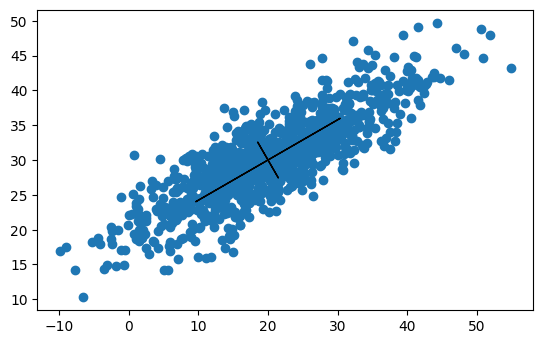

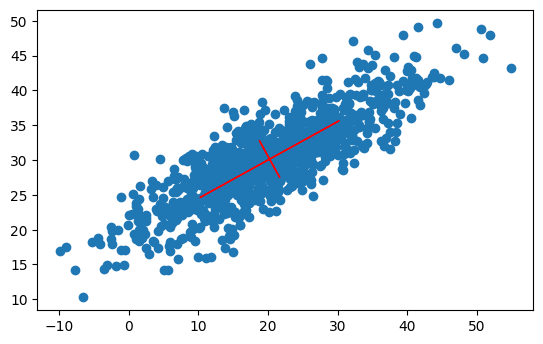

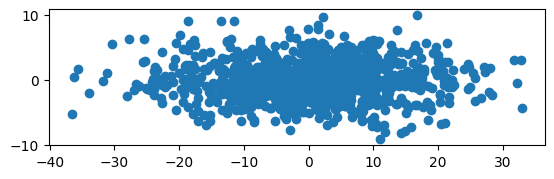

In [4]:
# Create synthetic data
theta1 = np.pi/6
theta2 = theta1 + np.pi/2

v1 = np.array((np.cos(theta1), np.sin(theta1)))
v2 = np.array((np.cos(theta2), np.sin(theta2)))

b = np.array((20,30))

rho1 = 12.
rho2 = 3.
n_points = 1000

seeds = np.random.randn(2, n_points)
X = b[:,None] + rho1 * np.outer(v1, seeds[0,:]) + \
                rho2 * np.outer(v2, seeds[1,:])

print(X.shape)

# Plot synthetic data
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(X[0, :], X[1, :])
ax.arrow(b[0]-v1[0]*rho1, b[1]-v1[1]*rho1, 2*v1[0]*rho1, 2*v1[1]*rho1, color='black')
ax.arrow(b[0]-v2[0]*rho2, b[1]-v2[1]*rho2, 2*v2[0]*rho2, 2*v2[1]*rho2, color='black')
ax.set_aspect('equal')

# Not normalizing the data, only subtracting the mean
X_mean = np.mean(X, axis=1)
U, s, VT = np.linalg.svd(X - X_mean[:, None], full_matrices=False)

# Verifying is all good
u1 = U[:,0]
u2 = U[:,1]

r = s / np.sqrt(n_points - 1)

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(X[0, :], X[1, :])
plt.arrow(X_mean[0]-u1[0]*r[0], X_mean[1]-u1[1]*r[0], 2*u1[0]*r[0], 2*u1[1]*r[0], color = 'red')
plt.arrow(X_mean[0]-u2[0]*r[1], X_mean[1]-u2[1]*r[1], 2*u2[0]*r[1], 2*u2[1]*r[1], color = 'red')
ax.set_aspect('equal')

# Calculating the matrix with the principal components
Phi = np.matmul(U.transpose(), X - X_mean[:, None])

# Plotting the principal components
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(Phi[0, :], Phi[1, :])
ax.set_aspect('equal')


## Multidimensional PCA with numeric data


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = 'ovariancancer_obs.csv'
ovariancancer_grp_path = 'ovariancancer_grp.csv'


A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
with open(ovariancancer_grp_path, "r") as fp:
  grp = np.array(fp.read().split("\n"))

grp = grp[grp != [''] ]

print(f"The number of patients is {A.shape[1]}")
print(f"The number of features is {A.shape[0]}")

print("The number of patients with cancer is ", np.sum(grp == 'Cancer'))
print("The number of patients without cancer is ", np.sum(grp == 'Normal'))

protein_x = 10
protein_y = 999

plt.scatter(A[protein_x, grp == 'Cancer'], A[protein_y, grp == 'Cancer'])
plt.scatter(A[protein_x, grp == 'Normal'], A[protein_y, grp == 'Normal'])
plt.legend(['Cancer', 'Normal'])

protein_z = 2000

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for cat in ['Cancer', 'Normal']:
  ax.scatter(A[protein_x, grp == cat], A[protein_y, grp == cat], A[protein_z, grp == cat])
ax.view_init(25, 20)

import plotly.express as px

px.scatter_3d(x = A[protein_x, :], y = A[protein_y, :], z = A[protein_z, :], color = grp)


A_mean = np.mean(A, axis=1)
A_mean.shape

A_bar = A - A_mean[:, None]
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].semilogy(s[:-1], 'o-')
axs[1].plot(np.cumsum(s)/np.sum(s))
axs[2].plot(np.cumsum(s**2)/sum(s**2))

Phi = U.T @ A_bar
COLOR_MAP = {
  'Cancer': 'red',
  'Normal': 'blue'
}

plt.scatter(Phi[0, :], Phi[1, :], c=[COLOR_MAP[e] for e in grp])

px.scatter_3d(x=Phi[0, :], y=Phi[1, :], z=Phi[2, :], color=grp)

## PCA on images

(20000, 785)
first principal component of 1st image -529.0964148086607
second principal component of 1st image -580.8608501624367


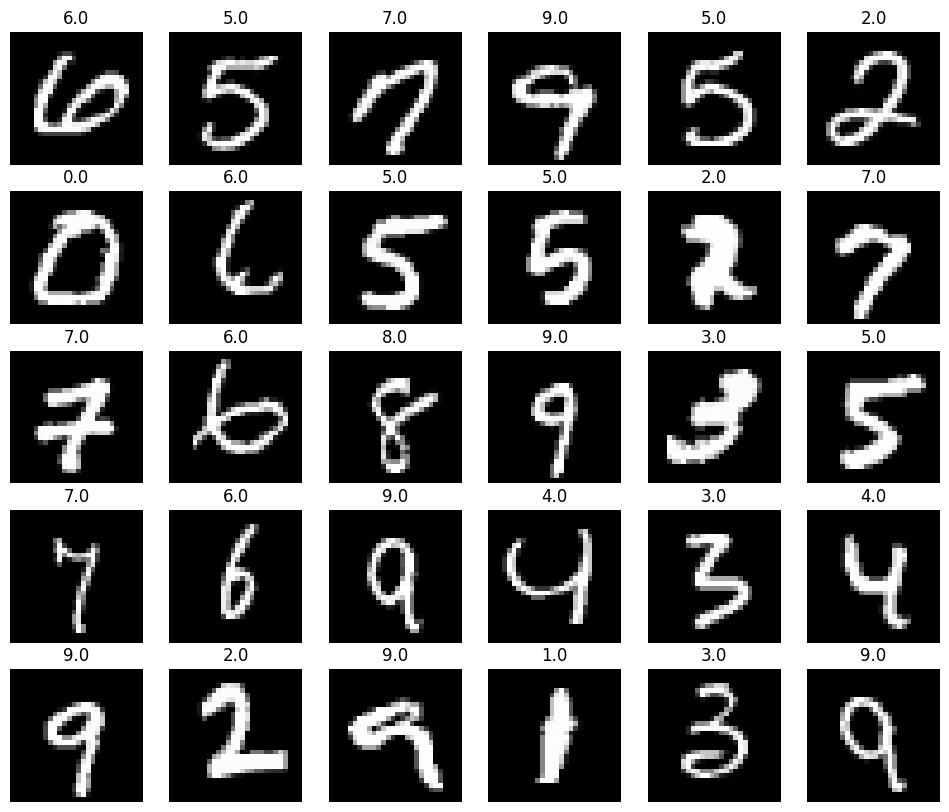

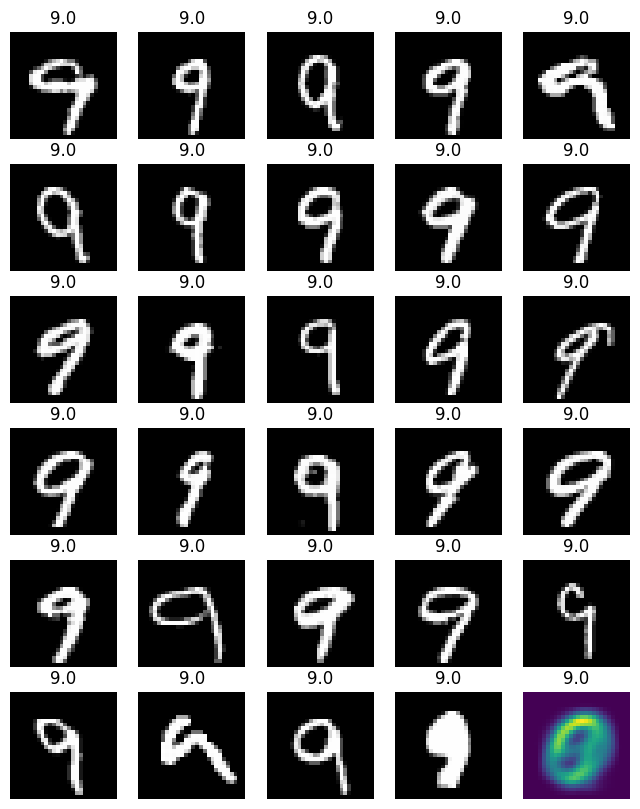

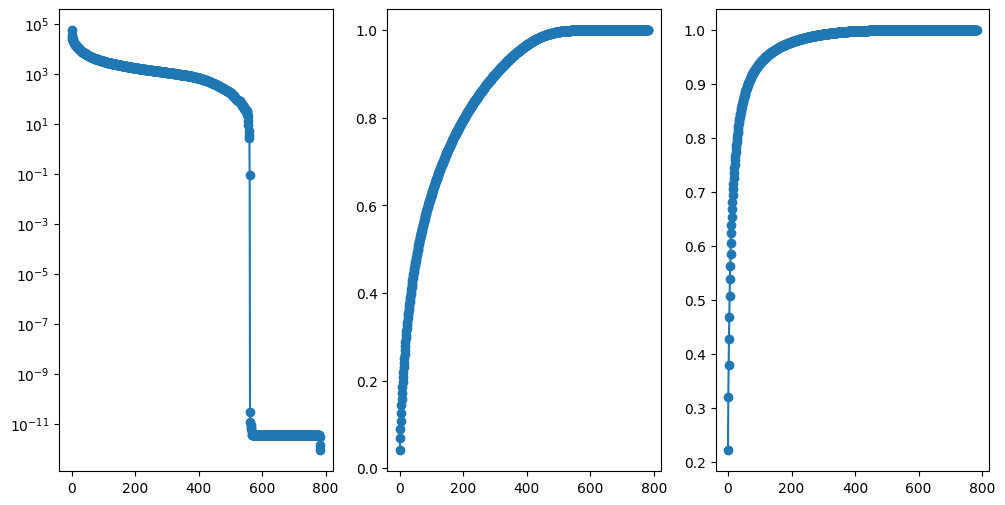

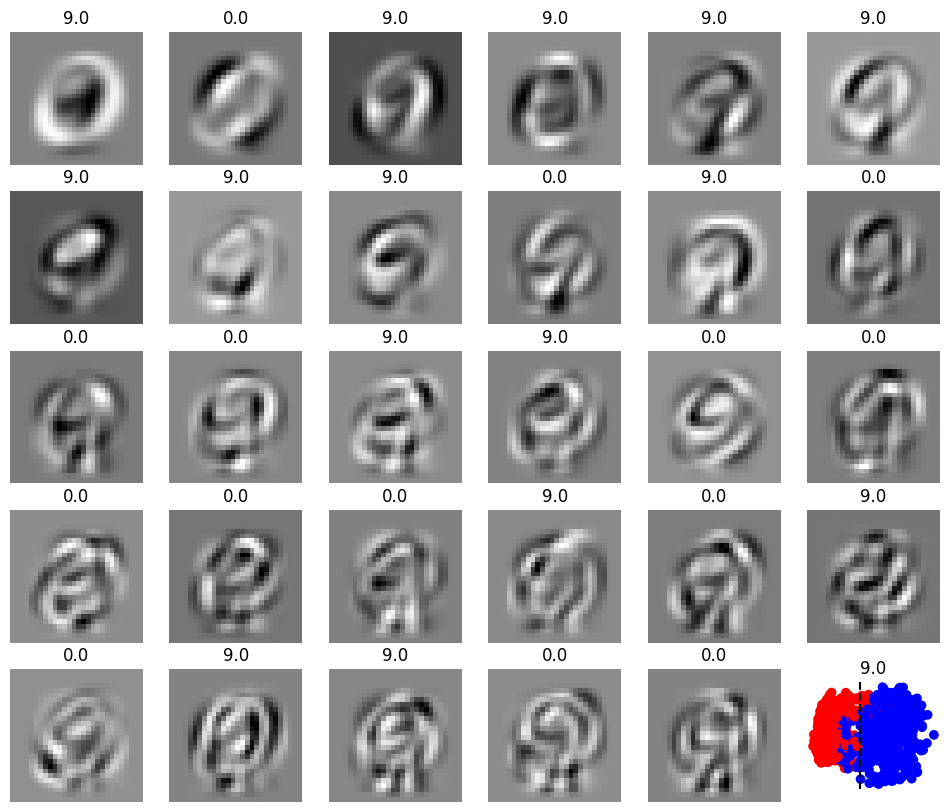

In [10]:
data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
print(data.shape)

labels_full = data[:, 0]
A_full = data[:, 1:].transpose()
labels_full.shape, A_full.shape

fig, axs = plt.subplots(5, 6, figsize= (12, 10))
axs = axs.reshape((-1))

# Display first images
for i in range(len(axs)):
  picture = A_full[:, i].reshape(28, 28)
  axs[i].imshow(picture, cmap="gray")
  axs[i].set_title(labels_full[i])
  axs[i].set_axis_off()



mask_9 = labels_full == 9
mask_4 = labels_full == 4

A9 = A_full[:, mask_9]
labels9 = labels_full[mask_9]

# Only show nines
fig, axs = plt.subplots(6, 5, figsize=(8, 10))
axs = axs.reshape((-1))
for i in range(len(axs)):
  axs[i].imshow(A9[:, i].reshape(28, 28), cmap='gray')
  axs[i].set_title(labels9[i])
  axs[i].set_axis_off()

mask_0 = labels_full == 0

A = A_full[:, mask_0 | mask_9]
labels = labels_full[mask_0 | mask_9]

A_mean = np.mean(A, axis=1)
A_bar = A-A_mean[:, None]
plt.imshow(A_mean.reshape((28, 28)))

U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].semilogy(s, 'o-')
axs[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')


fig, axs = plt.subplots(5, 6, figsize=(12, 10))
axs = axs.reshape((-1))
for i in range(len(axs)):
  picture = U [:, i].reshape((28, 28))
  axs[i].imshow(picture, cmap='gray')
  axs[i].set_title(f"{labels[i]}")
  axs[i].axis('off')

Phi = U.T @ A_bar
print(f"first principal component of 1st image {Phi[0, 0]}")
print(f"second principal component of 1st image {Phi[1, 0]}")

threshold = 0.0
n_pics = 500
COLORMAP = {9: 'red', 0: 'blue'}
plt.scatter(Phi[0, :n_pics], Phi[1, :n_pics], c = [COLORMAP[e] for e in labels[:n_pics]])
plt.axvline(threshold, color='black', linestyle='--')



#-------------- If needed test---------------
data_test_full = np.genfromtxt("sample_data/mnist_test.csv", delimiter=',')
labels_test_full = data_test_full[:, 0]
A_test_full = data_test_full[:, 1:].transpose()
# We have to construct the mask
mask = (labels_test_full == 9) | (labels_test_full == 0)
labels_test = labels_test_full[mask]
A_test = A_test_full[:, mask]

A_bar_test = A_test- A_mean[:, None] # the mean is the same
Phi_test = U.T @ A_bar_test

threshold = 0.0
n_pics = 500
COLORMAP = {9: 'red', 0: 'blue'}
plt.scatter(Phi_test[0, :n_pics], Phi_test[1, :n_pics], c = [COLORMAP[e] for e in labels_test[:n_pics]])
plt.axvline(threshold, color='black', linestyle='--')

# Image compression

In [5]:
from skimage.io import imread

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'path.jpg'

A = imread(image_path)

# Display the image
img = plt.imshow(A)
plt.axis('off')

# Convert to gray scale
X = np.mean(A, axis=2)
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray')
plt.show()

# SVD
U, s, VT = np.linalg.svd(X, full_matrices = False)

U.shape, s.shape, VT.shape

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

# Plotting of singular values
axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

# loop to visualize different compressed images with different number of singular values
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
  k = idxs[i]
  X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]),VT[:k,:]))
  axs[i].imshow(X_k, cmap='gray')
  axs[i].set_title(f'k = {k}')
  axs[i].axis('off')

FileNotFoundError: No such file: '/content/path.jpg'

# Randomized SVD


In [1]:
def randomized_SVD(A, k):
  P = np.random.randn(A.shape[1], k)
  Z = A @ P
  Q, _ = np.linalg.qr(Z)
  Y = Q.T @ A
  Uy, s, VT = np.linalg.svd(Y, full_matrices=False)
  U = Q @ Uy
  return U, s, VT

image_path = 'path.jpg'

A = imread(image_path)

X = np.mean(A, axis=2)

k = 100
U, s, VT = np.linalg.svd(X)
Ur, sr, VTr = randomized_SVD(X, k)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].loglog(s)
axs[1].semilogx(np.cumsum(s))
axs[2].semilogx(np.cumsum(s**2))

axs[0].loglog(sr)
axs[1].semilogx(np.cumsum(sr))
axs[2].semilogx(np.cumsum(sr**2))


# Display compressed images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(X, cmap="gray")
axs[0].set_axis_off()

axs[1].imshow(U[:, :k]@np.diag(s[:k])@VT[:k, :], cmap="gray")
axs[1].set_axis_off()


axs[2].imshow(Ur@np.diag(sr)@VTr, cmap="gray")
axs[2].set_axis_off()

# Evaluation (Precision, Recall, TP, TN, FP, FN)

true positives:  1
false positives: 0
true negatives:  1
false negatives: 1

sensitivity: 50.0%
specificity: 100.0%
accuracy: 66.7%


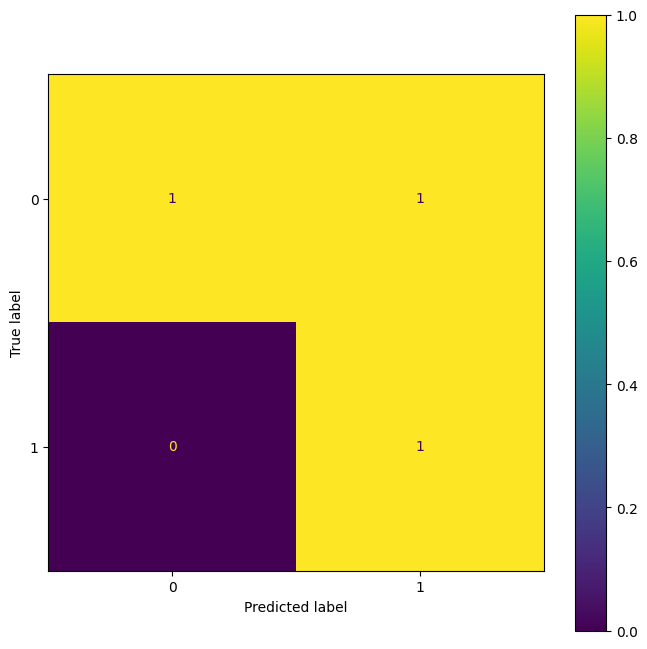

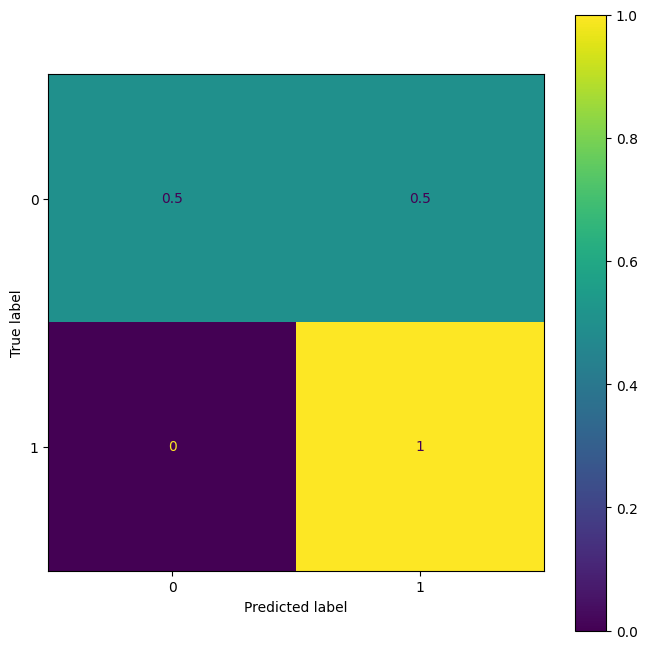

In [12]:
low_quality_predic = np.array([1, 0, 1])
low_quality_actual = np.array([1, 0, 0])

TP = np.sum(np.logical_and(low_quality_predic == 1, low_quality_actual == 1))
FP = np.sum(np.logical_and(low_quality_predic == 0, low_quality_actual == 1))
TN = np.sum(np.logical_and(low_quality_predic == 0, low_quality_actual == 0))
FN = np.sum(np.logical_and(low_quality_predic == 1, low_quality_actual == 0))
print('true positives:  %d' % TP)
print('false positives: %d' % FP)
print('true negatives:  %d' % TN)
print('false negatives: %d' % FN)
print()
print('sensitivity: %2.1f%%' % (100 * (TP) / (TP+FN)))
print('specificity: %2.1f%%' % (100 * (TN) / (TN+FP)))
print('accuracy: %2.1f%%' % (100 * (TP+TN) / (TP+TN+FP+FN)))

from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(low_quality_actual, low_quality_predic)
metrics.ConfusionMatrixDisplay.from_predictions(low_quality_actual, low_quality_predic, normalize ='true')

# Moore-Penrose Inverse

In [19]:
import scipy.linalg as la

# Based on full SVD
def my_pinv_fullSVD(A):
    U, s, VT = np.linalg.svd(A)
    s[s > 0] = 1 / s[s > 0]
    return VT.transpose() @ la.diagsvd(s, A.shape[1], A.shape[0]) @ U.transpose()

# Based on thin SVD
def my_pinv_thinSVD(A):
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    s[s > 0] = 1 / s[s > 0]
    return VT.transpose() @ np.diag(s) @ U.transpose()

A = np.random.randn(5, 4)
Apinv_numpy = np.linalg.pinv(A)
Apinv_fullSVD = my_pinv_fullSVD(A)
Apinv_thinSVD = my_pinv_thinSVD(A)
print(np.linalg.norm(Apinv_numpy - Apinv_fullSVD) / np.linalg.norm(Apinv_numpy))
print(np.linalg.norm(Apinv_numpy - Apinv_thinSVD) / np.linalg.norm(Apinv_numpy))

# Benchmark the three methods
%timeit np.linalg.pinv(A)
%timeit my_pinv_fullSVD(A)
%timeit my_pinv_thinSVD(A)


4.766395427738274e-17
4.766395427738274e-17
61.4 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.9 µs ± 598 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.1 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


m_hat = 1.993
q_hat = 2.828


9.930136612989092e-16

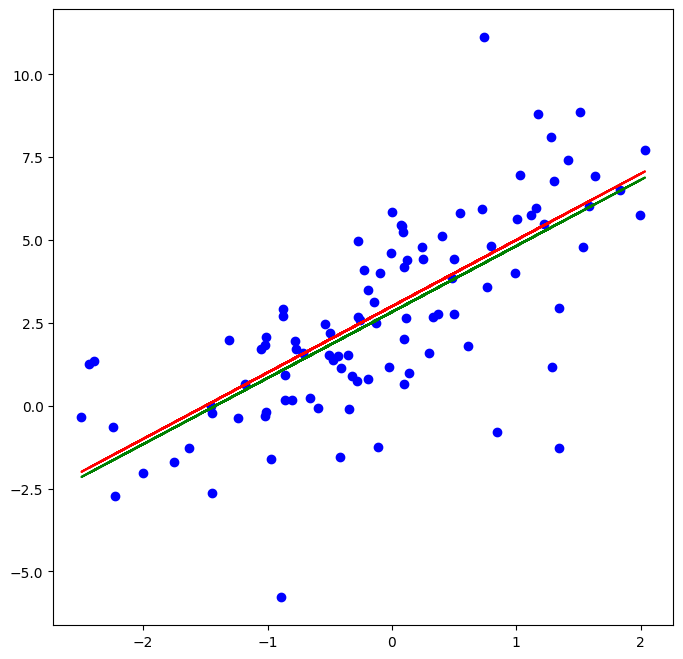

In [43]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m * X + q + noise * np.random.randn(N)

plt.scatter(X, Y, color='b')
plt.plot(X, m * X + q, 'r')

Phi = np.block([X[:, np.newaxis], np.ones((N, 1))])
z = my_pinv_thinSVD(Phi) @ Y
m_hat = z[0]
q_hat = z[1]
print(f"m_hat = {m_hat:.3f}")
print(f"q_hat = {q_hat:.3f}")


plt.plot(X, m_hat * X + q_hat, color="green")

# Solve the problem by solving the equations
z2 = np.linalg.solve(Phi.transpose() @ Phi, Phi.transpose() @ Y)
np.linalg.norm(z - z2)



# Least Square (LS) Regression

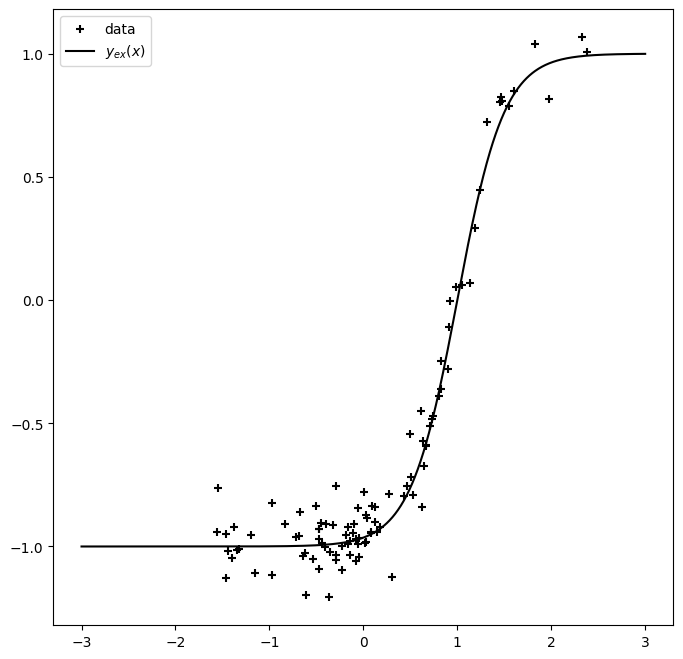

In [52]:
# (Difficult) data to make regression on (it is a tanh)

N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2 * (x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3, 3, N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.legend()

m_hat = 0.566
q_hat = -0.677


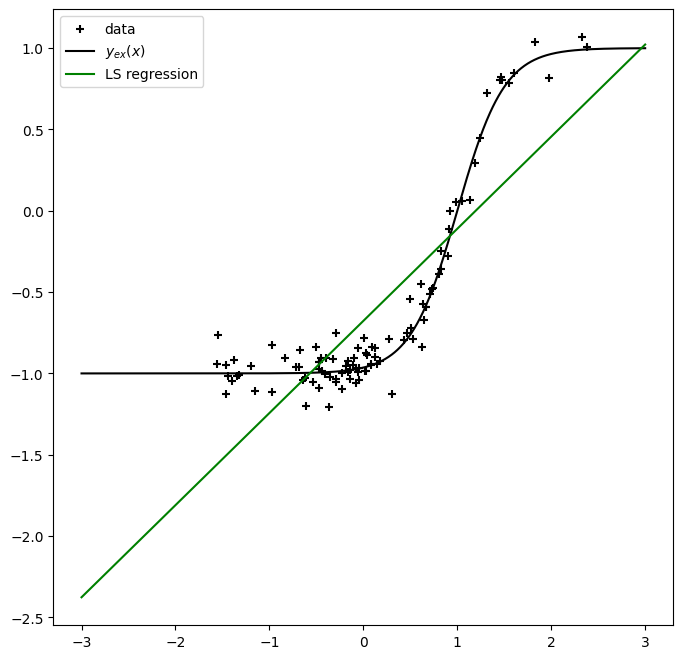

In [53]:
Phi = np.block([X[:, None], np.ones((N, 1))])
z = my_pinv_thinSVD(Phi) @ Y
m_hat = z[0]
q_hat = z[1]
print(f"m_hat = {m_hat:.3f}")
print(f"q_hat = {q_hat:.3f}")
Y_test_LS = m_hat * X_test + q_hat

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_test_LS, color="green", label="LS regression")
plt.legend()

# Ridge Regression

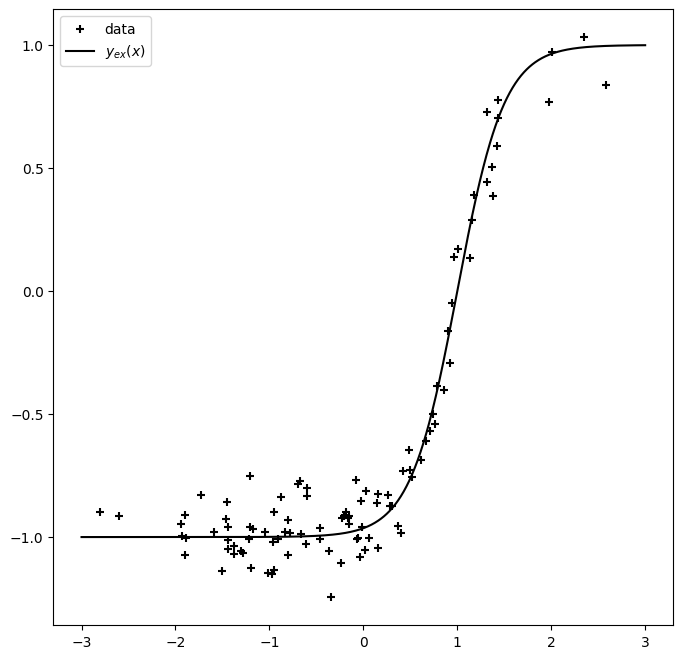

In [54]:
# (Difficult) data to make regression on (it is a tanh)

N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2 * (x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3, 3, N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.legend()

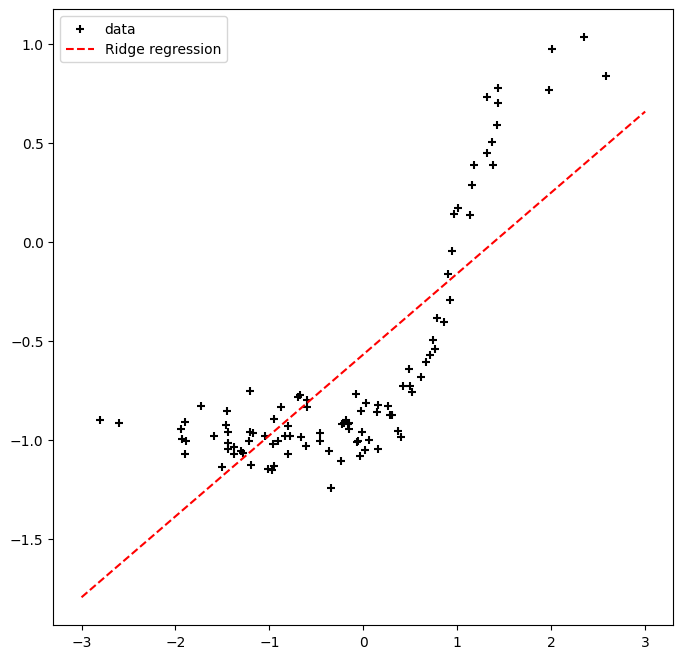

In [55]:
Phi = np.block([X[:, None], np.ones((N, 1))])

lam = 1.0
PhiPhiT = Phi @ Phi.transpose()
alpha = np.linalg.solve(PhiPhiT + lam * np.eye(N), Y)
w = Phi.transpose() @ alpha
Phi_test = np.block([X_test[:, None], np.ones((N_test, 1))])
Y_test_RR = Phi_test @ w

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_RR, color="red", linestyle="--", label="Ridge regression")
plt.legend()

# Kernel Regression

(-2.0, 2.0)

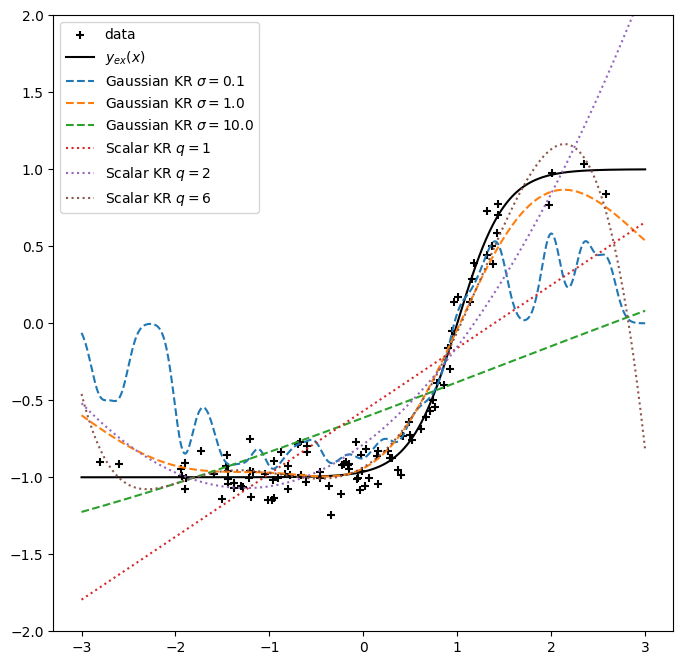

In [56]:
lam = 1.0


def scalar_product_kernel_q(q):
    def scalar_product_kernel(xi, xj):
        return (xi * xj + 1) ** q

    return scalar_product_kernel


def gaussian_kernel_sigma(sigma):
    def gaussian_kernal(xi, xj):
        return np.exp(-np.abs(xi - xj) ** 2 / (2 * sigma**2))

    return gaussian_kernal


def kernel_regression(kernel):
    K = np.array([[kernel(X[i], X[j]) for j in range(N)] for i in range(N)])
    alpha = np.linalg.solve(K + lam * np.eye(N), Y)
    K_test = np.array(
        [[kernel(X_test[i], X[j]) for j in range(N)] for i in range(N_test)]
    )
    Y_test_KR = K_test @ alpha
    return Y_test_KR


plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
for sigma in [0.1, 1.0, 10.]:
    plt.plot(
        X_test,
        kernel_regression(gaussian_kernel_sigma(sigma)),
        linestyle="--",
        label=f"Gaussian KR $\sigma = {sigma}$",
    )
for q in [1, 2, 6]:
    plt.plot(
        X_test,
        kernel_regression(scalar_product_kernel_q(q)),
        linestyle=":",
        label=f"Scalar KR $q = {q}$",
    )
plt.legend()
plt.ylim([-2, 2])

# Matrix Completion

In [57]:
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr

In [ ]:
dataset = pd.read_csv("movielens.csv", sep="\t", header=None)
dataset.describe()

In [ ]:
rows = np.array(dataset[0]) - 1
cols = np.array(dataset[1]) - 1
vals = np.array(dataset[2])

n = rows.max() + 1
p = cols.max() + 1
d = len(rows)

print(f"{n} people")
print(f"{p} movies")
print(f"{d} ratings")

In [ ]:
idxs = np.arange(d)
np.random.seed(1)  # for reproducibility
np.random.shuffle(idxs)
rows = rows[idxs]
cols = cols[idxs]
vals = vals[idxs]

In [ ]:
training_data = int(0.8 * d) # use 80% of the data as training

rows_train = rows[:training_data]
cols_train = cols[:training_data]
vals_train = vals[:training_data]
rows_test = rows[training_data:]
cols_test = cols[training_data:]
vals_test = vals[training_data:]

In [ ]:
X_sparse = csr_matrix((vals_train, (rows_train, cols_train)), shape=(n, p))
X_full = X_sparse.toarray()

In [58]:
avg_ratings = np.array([np.mean(vals_train[rows_train == i]) for i in range(n)])
vals_trivial = avg_ratings[rows_test]

errors_trivial = vals_test - vals_trivial

RMSE_trivial = np.sqrt(np.mean(errors_trivial**2))
rho_trivial = pearsonr(vals_test, vals_trivial)[0]
print(f"RMSE: {RMSE_trivial:1.3f}")
print(f"rho : {rho_trivial:1.3f}")

NameError: name 'n' is not defined

In [ ]:
# SVT
n_max_iter = 100
threshold = 100.0
increment_tol = 1e-6

RMSE_list = list()
rho_list = list()

A = X_full.copy()
for i in range(n_max_iter):
    A_old = A.copy()
    # See LAB03 on Github to see it with rSVD
    U, s, VT = np.linalg.svd(A, full_matrices=False)

    s[s < threshold] = 0
    A = U @ np.diag(s) @ VT

    A[rows_train, cols_train] = vals_train
    increment = np.linalg.norm(A - A_old)

    vals_predicted = A[rows_test, cols_test]
    errors = vals_test - vals_predicted

    RMSE_list.append(np.sqrt(np.mean(errors**2)))
    rho_list.append(pearsonr(vals_test, vals_predicted)[0])

    print(f"=============== Iteration {i+1} - increment norm {increment:1.3e}")
    print(f"RMSE: {RMSE_list[-1]:1.3f}")
    print(f"rho:  {rho_list[-1]:1.3f}")
    if increment < increment_tol:
        break

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

axs[0].loglog(RMSE_list, "o-")
axs[0].axhline(RMSE_trivial, color="red")
axs[0].legend(["RMSE", "RMSE trivial"])

axs[1].loglog(rho_list, "o-")
axs[1].axhline(rho_trivial, color="red")
axs[1].legend([r"$\rho$", r"$\rho$ trivial"])


# Support Vector Regression (SVR)

In [59]:
import jax
import jax.numpy as jnp
import jax.scipy.optimize
from sklearn.model_selection import train_test_split

In [60]:
class SVR:
    def __init__(self, epsilon=0.1, lmbda=1.0):
        self.epsilon = epsilon
        self.lmbda = lmbda
        self.w = None

    def loss(self, params, X, y):
        predictions = jnp.dot(X, params[:-1]) + params[-1]

        # Compute epsilon-insensitive loss
        epsilon_loss = jnp.maximum(0, jnp.abs(predictions - y) - self.epsilon)

        # Regularization term (L2 norm of w)
        reg_term = self.lmbda * jnp.sum(params**2)

        # Total loss
        return reg_term + jnp.mean(epsilon_loss)

    def train(self, X, y):
        _, n_features = X.shape

        # Initialize weights and bias
        self.w = jnp.zeros(n_features + 1)

        # Solve optimization problem
        opt_res = jax.scipy.optimize.minimize(
            self.loss, self.w, method="BFGS", args=(X, y)
        )
        self.w = opt_res.x

    def predict(self, X):
        return jnp.dot(X, self.w[:-1]) + self.w[-1]

In [61]:
np.random.seed(0)  # For reproducibility
m = 2.5  # Slope
c = 1.0  # Intercept
n_samples = 100

# Generate X values uniformly distributed between 0 and 10
X = np.random.uniform(0, 10, size=(n_samples, 1))

# Create the line (y = mx + c) and add Gaussian noise
noise = np.random.normal(0, 1, size=(n_samples, 1))  # Gaussian noise
y = m * X + c + noise  # Add noise to the true line
y = y.flatten()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert data to JAX arrays
X_train = jnp.array(X_train)
y_train = jnp.array(y_train)
X_test = jnp.array(X_test)
y_test = jnp.array(y_test)

In [63]:
svr = SVR(epsilon=1.0, lmbda=0.1)
svr.train(X_train, y_train)

In [64]:
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

In [65]:
mse_train = jnp.mean((y_train - y_pred_train) ** 2)
mse_test = jnp.mean((y_test - y_pred_test) ** 2)
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")

Train MSE: 1.2319
Test MSE: 1.0931


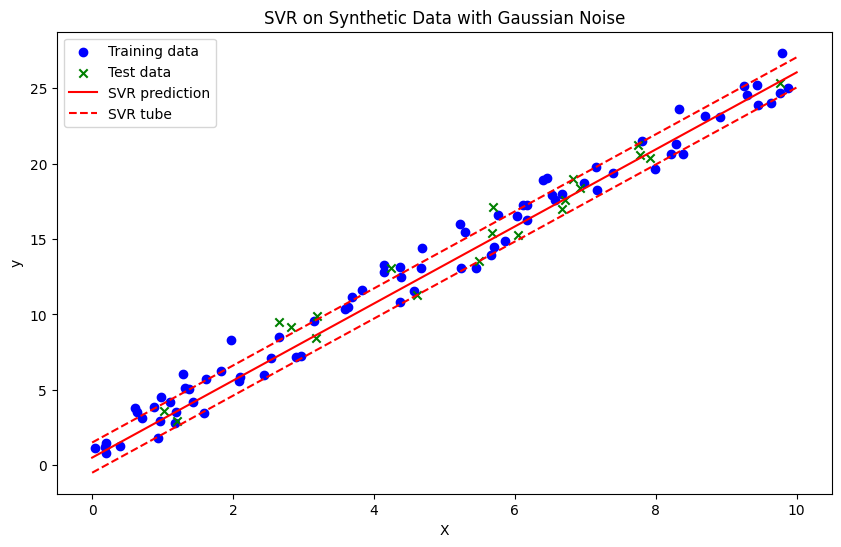

In [66]:
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color="blue", label="Training data")
# Plot test data
plt.scatter(X_test, y_test, color="green", marker="x", label="Test data")

# Plot the prediction line (SVR model)
x_range = jnp.linspace(0, 10, 100).reshape(-1, 1)
y_pred_line = svr.predict(x_range)
plt.plot(x_range, y_pred_line, color="red", label="SVR prediction")
plt.plot(x_range, y_pred_line - svr.epsilon, "r--", label="SVR tube")
plt.plot(x_range, y_pred_line + svr.epsilon, "r--")

plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR on Synthetic Data with Gaussian Noise")
plt.legend()
plt.show()

# Support Vector Machines

In [67]:
class SVM:
    def __init__(self, lmbda=1.0):
        self.lmbda = lmbda
        self.w = None

    def loss(self, params, X, y):
        # Compute the decision function
        decision = jnp.dot(X, params[:-1]) + params[-1]
        # Compute the hinge loss
        loss_val = jnp.maximum(0, 1 - y * decision)
        # Regularization term (L2 norm of w)
        reg_term = self.lmbda * jnp.sum(params ** 2)
        # Total loss
        return reg_term + jnp.mean(loss_val)

    def train(self, X, y):
        _, n_features = X.shape

        # Initialize weights and bias
        self.w = jnp.zeros(n_features + 1)

        # Solve optimization problem
        opt_res = jax.scipy.optimize.minimize(self.loss, self.w, method="BFGS", args=(X, y))
        self.w = opt_res.x

    def predict(self, X):
        # Decision function
        decision = jnp.dot(X, self.w[:-1]) + self.w[-1]
        return jnp.sign(decision)

In [68]:
np.random.seed(42)  # For reproducibility
n_samples = 100

# Generate X values uniformly distributed between [0, 10]^2
X = np.random.uniform(0, 10, size=(n_samples, 2))

# Generate binary labels
y = np.where(X.sum(axis=1) > 10, 1, -1)
y = y.flatten()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to JAX arrays
X_train = jnp.array(X_train)
y_train = jnp.array(y_train)
X_test = jnp.array(X_test)
y_test = jnp.array(y_test)

In [70]:
svm = SVM(lmbda=0.001)
svm.train(X_train, y_train)

In [71]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [72]:
accuracy_train = jnp.mean(y_pred_train == y_train)
accuracy_test = jnp.mean(y_pred_test == y_test)
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Train Accuracy: 0.9500
Test Accuracy: 0.9500


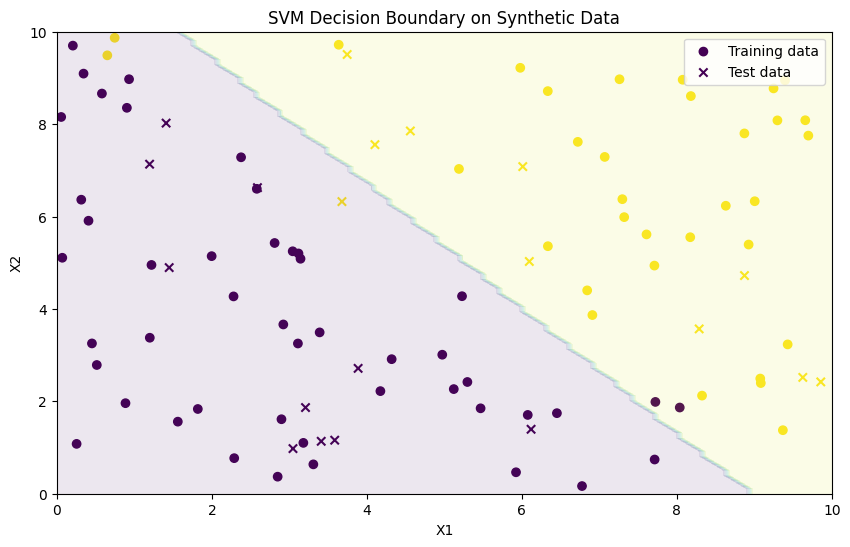

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training data', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test data', marker='x')

# Plot the decision boundary
t = np.linspace(0, 10, 100)
xx1, xx2 = np.meshgrid(t, t)
xx = np.stack([xx1.flatten(), xx2.flatten()], axis=1)
yy = svm.predict(xx)
plt.contourf(xx1, xx2, yy.reshape(xx1.shape), alpha=0.1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary on Synthetic Data')
plt.legend(loc="upper right")
plt.show()

# Kernel SVM

In [97]:
# Importing required libraries

!pip install jaxopt

import jax
import jax.numpy as jnp
from jaxopt import BoxOSQP

from sklearn import datasets
from sklearn import preprocessing


In [98]:
def rbf_kernel(X1, X2, gamma): # each entry must be the distance of these two points
    # This must work when X1 and X2 are matrices
    # each element of the kernel, given two vectors x1, x2 as inputs is
    # exp(- \gamma (||x_1||^2 + ||x_2||^2 - 2 <x_1, x_2>))
    # Compute ||x_1||^2, ||x_2||^2, <x_1, x_2> separatly with X1, X2 matrices
    # and than combine them together (use broadcasting)
  sq_dist = -2 * jnp.dot(X1, X2.T) + jnp.sum(X1**2, axis=1)[:, None] + jnp.sum(X2**2, axis=1)[None, :]
    # if X1 has shape (n1, dim) and X2 has shape (n2, dim)
    # the output shall have shape (n1, n2)
  return jnp.exp(-gamma * sq_dist)

In [99]:
def binary_kernel_svm_osqp(X, y, C, gamma):
    K = rbf_kernel(X, X, gamma)

    # 0.5 beta^T K beta
    def matvec_Q(Q, beta):
        return jnp.dot(Q, beta)

    # return beta and the sum of betas, for the constrait
    def matvec_A(_, beta):
        return beta, jnp.sum(beta)

    # first element of the tuple is the elementwise constraint on \beta_i
    # second element of the tuple is the constraint on the sum of betas
    # the tuple has size two like the size of the tuple returned by `matvec_A`
    l = -jax.nn.relu(-y * C), 0.
    u = jax.nn.relu(y * C), 0.

    # build and run the optimizer
    osqp = BoxOSQP(matvec_Q=matvec_Q, matvec_A=matvec_A, tol=1e-6)
    params, _ = osqp.run(
        init_params=None,
        params_obj=(K, -y), # parameters passed to `matvec_Q` and used for `y^T \beta`
        params_eq=None,
        params_ineq=(l, u)
    )
    beta = params.primal[0]

    return beta

In [100]:
def compute_bias(X, y, beta, gamma):
    # Compute the bias term b by using a support vector
    support_indices = jnp.where(jnp.abs(beta) > 1e-4)[0]
    if len(support_indices) > 0:
        i = support_indices[0]
        # https://stats.stackexchange.com/questions/451868/calculating-the-value-of-b-in-an-svm
        # the loop on SV is equivalent to a loop on all betas since beta is almost 0
        return y[i]-jnp.sum(beta[support_indices] * rbf_kernel(X[support_indices], X[i:i+1], gamma).reshape((-1,)))
    else:
        return 0.

In [101]:
def decision_function(X_train, y_train, X_test, beta, gamma, b):
    K_test = rbf_kernel(X_test, X_train, gamma=gamma)
    b = compute_bias(X_train, y_train, beta, gamma=gamma)
    return K_test @ beta + b

[[ 0.73984947  0.73694229]
 [ 0.43497316 -0.36007809]
 [ 0.69937529 -0.66178683]
 [-0.42027197 -0.8545037 ]
 [-0.05550975 -0.54570996]
 [-0.37494636 -0.3330314 ]
 [ 0.13229686 -0.49278757]
 [-0.14861849 -1.01665456]
 [ 0.30751949  0.30541104]
 [-0.49471375  0.14932314]
 [-0.4592365   0.8774803 ]
 [ 0.40546379  0.22724459]
 [-0.91351269 -0.2444846 ]
 [ 0.83327534 -0.35726283]
 [-0.48353307 -0.12300242]
 [-0.24425204  0.45027833]
 [ 0.82679752  0.4896542 ]
 [ 0.57176131 -0.22692508]
 [-0.74588122  0.52925948]
 [-0.051239    0.95952503]
 [ 0.16171245  0.49545536]
 [-0.05092077  0.5500528 ]
 [-0.81267617 -0.62107129]
 [-0.98035322  0.18974834]
 [-0.25061724 -0.43090663]
 [ 0.40698179  0.94113523]
 [ 1.01652672 -0.07179142]
 [-0.40313208  0.34992286]
 [ 0.48879806 -0.02100917]
 [ 0.35900848 -0.92950481]]
----------
[0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0]


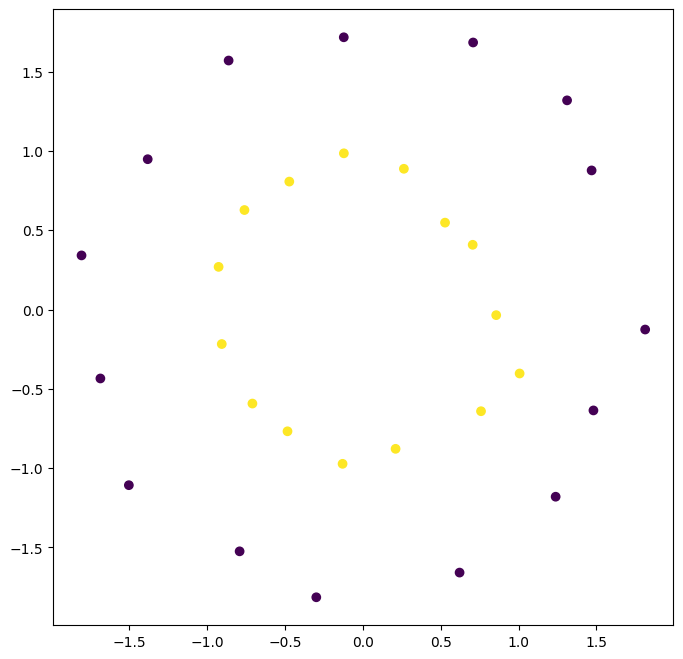

In [96]:
num_samples = 30
lam = 0.001
gamma = 0.5  # Gamma parameter for RBF kernel

np.random.seed(0)

# Prepare circular dataset
X, y = datasets.make_circles(n_samples=num_samples, factor=0.5, noise=0.05)  # Circle data
print(X)
print("----------")
print(y)
X = preprocessing.StandardScaler().fit_transform(X)  # Scale data
y = jnp.array(y * 2. - 1.)  # Transform labels from {0, 1} to {-1., 1.}

C = 1 / (2 * lam * num_samples)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y)

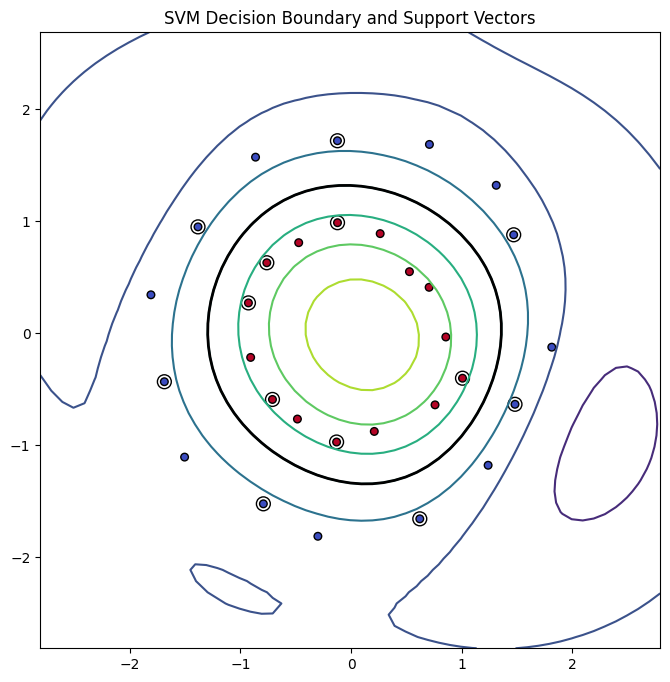

In [102]:
# Solve with OSQP

beta = binary_kernel_svm_osqp(X, y, C, gamma)

# Create a grid of points to evaluate the decision function
h = .1  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the decision function for each point in the grid
# 1. use `jnp.c_`, which concatenate slices, scalars and array-like objects along the last axis
#    to build X_test from `xx` and `yy`
# 2. use `decision_function` to compute the predictions `Z`
X_test = jnp.c_[xx.ravel(), yy.ravel()]
b = compute_bias(X, y, beta, gamma)
Z = decision_function(X, y, X_test, beta, gamma, b)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, )
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # Decision boundary

support_vectors = jnp.where(jnp.abs(beta) > 1e-4)[0]
# Highlight the support vectors
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100, facecolors='none', edgecolors='k')

plt.title("SVM Decision Boundary and Support Vectors")
plt.show()

# Types of Gradient Descent



## Gradient Descent

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Set random seed for reproducibility
key = jax.random.PRNGKey(0)

In [5]:
def plot_optimization_2d(func, gd_path, gd_backtrack_path, title):
    x_vals = jnp.linspace(-5, 5, 50)
    y_vals = jnp.linspace(-5, 5, 50)
    X, Y = jnp.meshgrid(x_vals, y_vals)
    Z = jnp.array([[func(jnp.array([x, y])) for x in x_vals] for y in y_vals])

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    cs = axs[0].contourf(X, Y, Z, levels=50, cmap="viridis")
    plt.colorbar(cs)
    axs[0].contour(X, Y, Z, colors="white")

    gd_path = jnp.array(gd_path)

    axs[0].plot(gd_path[:, 0], gd_path[:, 1], "r.-", label="GD")

    if gd_backtrack_path != []:
        gd_backtrack_path = jnp.array(gd_backtrack_path)
        axs[0].plot(
            gd_backtrack_path[:, 0],
            gd_backtrack_path[:, 1],
            ".-",
            color="orange",
            label="GD + backtracking",
        )
    axs[0].set_title(title)
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].set_ylim([-5, 5])
    axs[0].set_xlim([-5, 5])
    axs[0].legend()

    axs[1].semilogy([func(x) for x in gd_path], "ro-", label="GD")
    axs[1].semilogy(
        [func(x) for x in gd_backtrack_path],
        "o-",
        color="orange",
        label="GD + backtracking",
    )
    axs[1].legend()
    plt.tight_layout()


In [4]:
# Define functions

# 1. Rastrigin function
@jax.jit
def rastrigin(x):
    return 10 * x.size + jnp.sum(x**2 - 10 * jnp.cos(2 * jnp.pi * x)) + 1e-10


# 2. Ackley function
@jax.jit
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * jnp.pi
    sum1 = jnp.sum(x**2)
    sum2 = jnp.sum(jnp.cos(c * x))
    return (
        -a * jnp.exp(-b * jnp.sqrt(sum1 / x.size))
        - jnp.exp(sum2 / x.size)
        + a
        + jnp.exp(1)
    )

# 3. Quadratic function
quadratic_A = jnp.array([[3.0, 0.5], [0.5, 1.0]])
quadratic_b = jnp.array([-1.0, 2.0])
quadratic_c = jnp.dot(quadratic_b, jnp.linalg.solve(quadratic_A, quadratic_b)) / 2



@jax.jit
def quadratic(x):
    return (
        0.5 * jnp.dot(x.T, jnp.dot(quadratic_A, x))
        + jnp.dot(quadratic_b, x)
        + quadratic_c
    )

In [13]:
def gradient_descent(grad_func, x0, lr = 0.01, tol=1e-6, max_iter=5000):
  # inputs : gradient of the function, starting point, learning rate, 2 stoppings condition: tolerance and max number of iterations
  x = x0
  path = [x] # visualization purposes only
  for i in range(max_iter):
    # 1. gradient iteration
    grad_val = grad_func(x)
    if (jnp.linalg.norm(grad_val) < tol):
      break
    x = x - lr * grad_val
    path.append(x)

  return x, path

Testing on Rastrigin function
Testing on Ackley function
Testing on Quadratic function


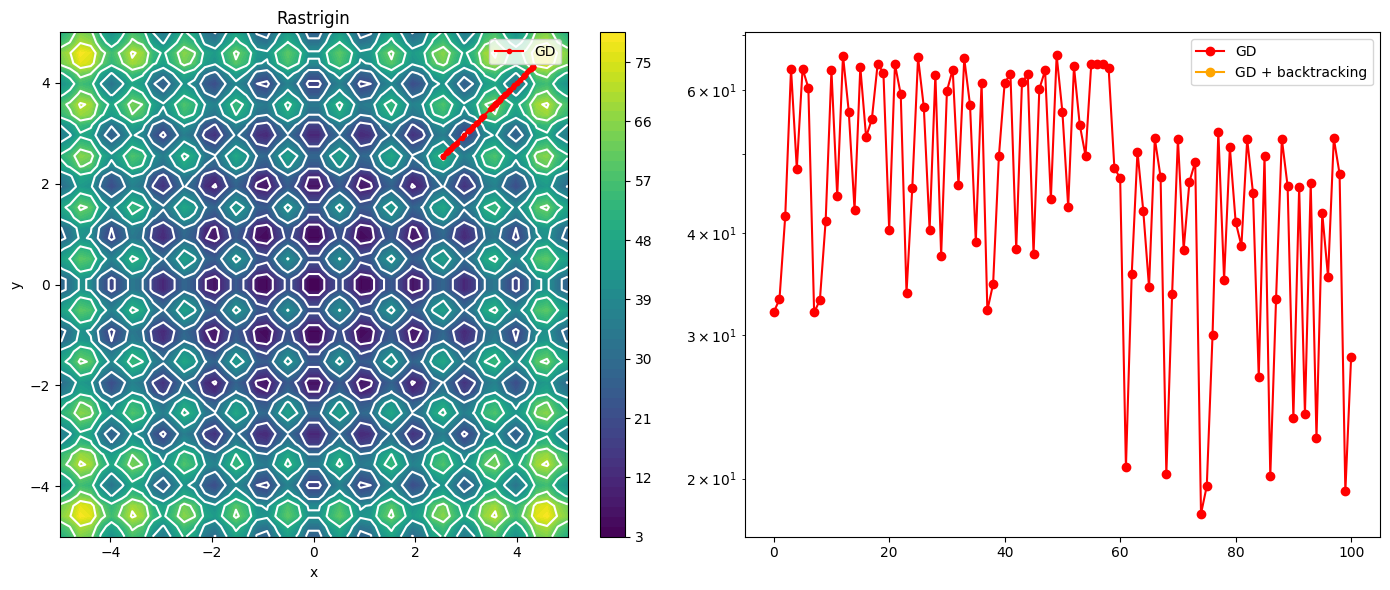

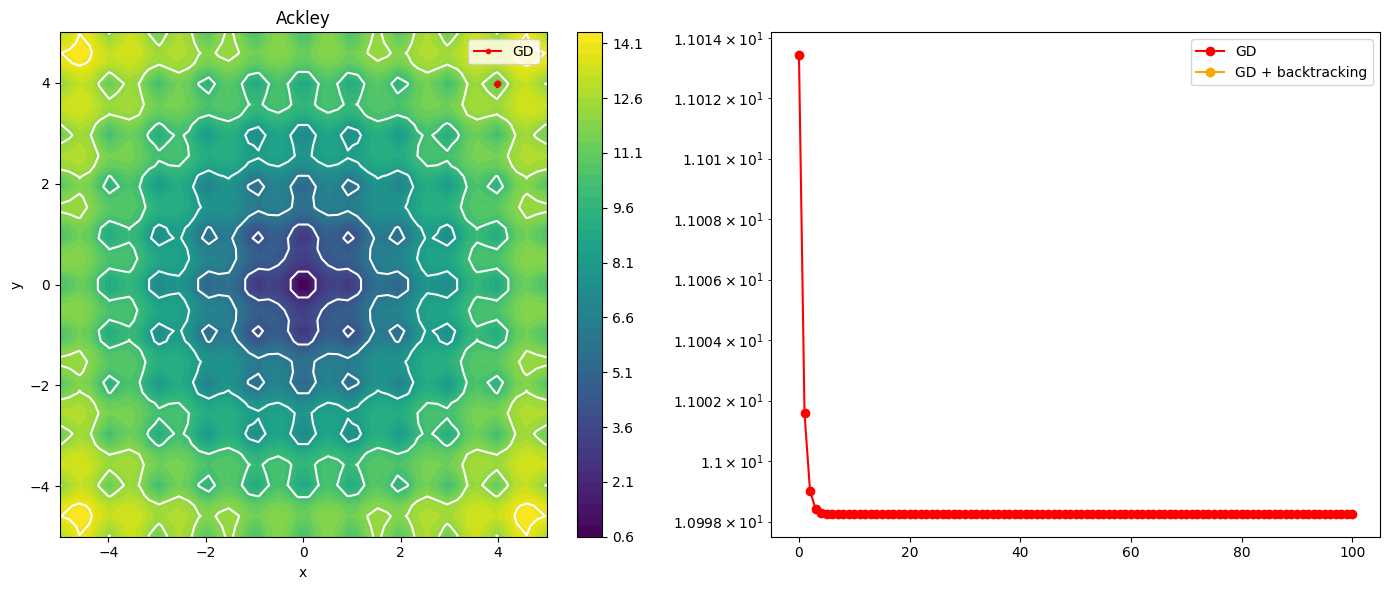

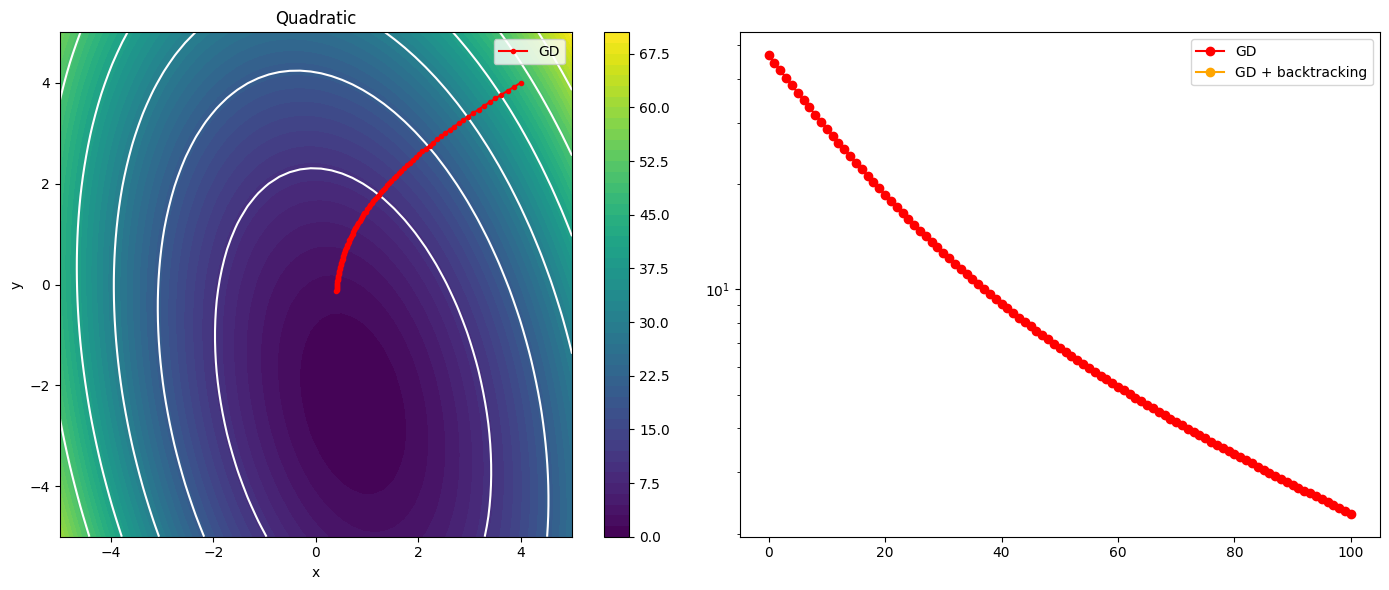

In [18]:
x0 = jnp.array([4.0, 4.0])

test_functions = [
    (rastrigin, "Rastrigin"),
    (ackley, "Ackley"),
    (quadratic, "Quadratic"),
]

for func, name in test_functions:
    grad_func = jax.jit(jax.grad(func))
    print(f"Testing on {name} function")

    # Run Vanilla Gradient Descent
    x, gd_path = gradient_descent(grad_func, x0, lr=0.01, tol=1e-6, max_iter = 100)
    plot_optimization_2d(func, gd_path, [], title=f"{name}")

## Backtracking Gradient Descent

In [7]:
def gradient_backtracking_search(func, grad_func, x0, alpha=0.3, beta=0.8, tol=1e-6, max_iter=100):
  x = x0
  path = [x]
  for _ in range(max_iter):
    # 1. Gradient iteration
    grad_val = grad_func(x)
    if (jnp.linalg.norm(grad_val) < tol):
      break
    # 1.1 initialize t=1
    func_val = func(x)
    t = 1
    # 2. while condition
    while func( x - t * grad_val) > func_val - alpha * t * jnp.dot(grad_val, grad_val):
      # 2.1 update t
      t = t * beta
      # 2.2 update x
      x = x - t * grad_val
      path.append(x)
    return x, path

In [21]:
x0 = jnp.array([4.0, 4.0])

test_functions = [

    (quadratic, "Quadratic"),
]

for func, name in test_functions:
    grad_func = jax.jit(jax.grad(func))
    print(f"Testing on {name} function")

    # Run Gradient Backtracking Descent
    x, gd_path = gradient_backtracking_search(func, grad_func, x0, title="Backtracking Gradient Search")
    plot_optimization_2d(func, gd_path, [], title=f"{name}")

Testing on Quadratic function


KeyboardInterrupt: 

## Exact Line Search (only for quadratic functions)

In [8]:
def exact_line_search_quadratic(A, b, x0, tol=1e-6, max_iter=100):
  x = x0
  path = [x]
  for _ in range(max_iter):
    grad_val = jnp.dot(A, x) + b
    if (jnp.linalg.norm(grad_val) < tol):
      break
    t = jnp.dot(grad_val, grad_val) / jnp.dot(grad_val, jnp.dot(A, grad_val))
    x = x - t * grad_val
    path.append(x)
  return x, path

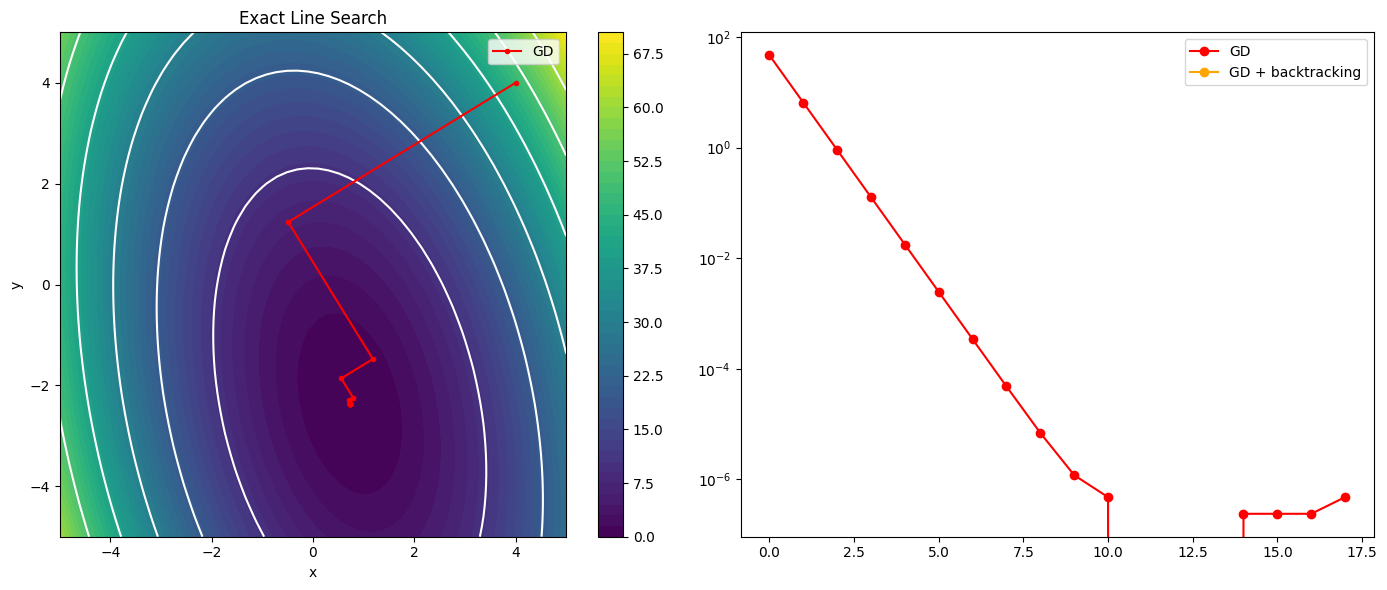

In [22]:
x, path = exact_line_search_quadratic(quadratic_A, quadratic_b, x0)
plot_optimization_2d(quadratic, path, [], title="Exact Line Search")

## Stochastic Gradient Descent with Mini Batches

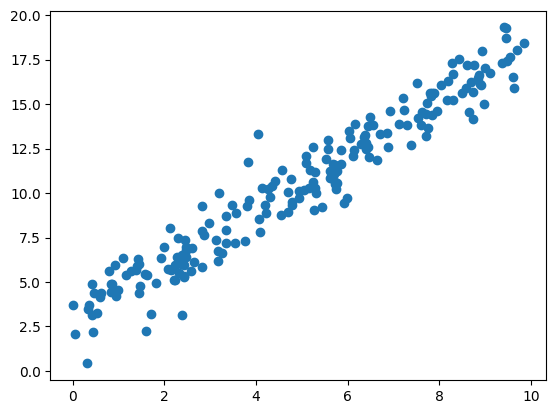

In [23]:
# Example on a dataset

# Generate synthetic data
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
N = 200
x_data = jax.random.uniform(key, shape=(N, ), minval=0, maxval=10)
y_data = 1.5 * x_data + 3 + jax.random.normal(subkey, shape=(N, ))
plt.scatter(x_data, y_data)

In [24]:
# Split into training and validation sets
train_size = int(0.8 * N)
val_size = N - train_size

# Shuffling the indices for a randomized split
key, subkey = jax.random.split(key)
indices = jax.random.permutation(subkey, N)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Creating training and validation sets
x_train, y_train = x_data[train_indices], y_data[train_indices]
x_val, y_val = x_data[val_indices], y_data[val_indices]

In [26]:
@jax.jit
def model(theta, x):
  return theta[0] + theta[1] * x

In [27]:
@jax.jit
def mse_loss(theta, x, y):
  y_pred = model(theta, x)
  return jnp.mean((y_pred - y)**2)

In [28]:
grad_mse_loss = jax.jit(jax.grad(mse_loss))

In [29]:
@jax.jit
def sgd_update(theta, x_batch, y_batch, lr):
  grads = grad_mse_loss(theta, x_batch, y_batch)
  return theta - lr * grads

In [30]:
def stochastic_gradient_descent(
    theta,
    training_input,
    training_labels,
    validation_input,
    validation_labels,
    learning_rate=0.01,
    epochs=100,
    batch_size=10,
    state=0,
):
    key = jax.random.PRNGKey(state)
    # Iterate over the number of epochs
    for epoch in range(epochs):
        # Shuffle data indices using JAX's random key
        key, subkey = jax.random.split(key)
        perm = jax.random.permutation(subkey, len(training_input))
        # Process data in mini-batches
        for i in range(0, len(training_input), batch_size):
            batch_idx = perm[i : i + batch_size]
            x_batch = training_input[batch_idx]
            y_batch = training_labels[batch_idx]
            # Perform SGD update
            theta = sgd_update(theta, x_batch, y_batch, learning_rate)
        # Print the loss every 10 epochs
        if epoch % 10 == 0:
            loss = mse_loss(theta, validation_input, validation_labels)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return theta

In [31]:
# Run the Stochastic Gradient Descent
theta = jnp.array(
    [0.0, 0.0]
)  # Initial guess for theta_0 (intercept) and theta_1 (slope)
theta_opt = stochastic_gradient_descent(
    theta, x_train, y_train, x_val, y_val, learning_rate=0.01, epochs=100, batch_size=10
)
print(
    f"Optimized parameters: theta_0 = {theta_opt[0]:.2f}, theta_1 = {theta_opt[1]:.2f}"
)

Epoch 0, Loss: 2.5837
Epoch 10, Loss: 1.5520
Epoch 20, Loss: 1.6904
Epoch 30, Loss: 1.2785
Epoch 40, Loss: 1.2649
Epoch 50, Loss: 1.4547
Epoch 60, Loss: 1.2590
Epoch 70, Loss: 1.3241
Epoch 80, Loss: 1.2949
Epoch 90, Loss: 1.2626
Optimized parameters: theta_0 = 2.84, theta_1 = 1.54


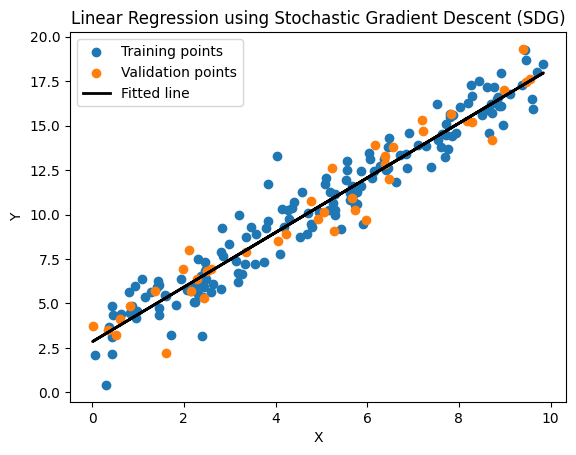

In [32]:
# After the training loop, use the optimized parameters to plot the regression line
# Generate predictions using the optimized parameters
y_pred = model(theta_opt, x_data)

# Plot the original data points
plt.scatter(x_train, y_train, label="Training points")
plt.scatter(x_val, y_val, label="Validation points")

# Plot the regression line
plt.plot(x_data, y_pred, label="Fitted line", color="black", linewidth=2)

# Add labels and a legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression using Stochastic Gradient Descent (SDG)")
plt.legend()
plt.show()

# Deep Neural Networks

## Data Reading and Train-Test Splitting

In [127]:
import time

data = pd.read_csv('sample_data/california_housing_train.csv')

data = data[data["median_house_value"] < 500001]

# Standardization
data_mean = data.mean()
data_std = data.std()
data_normalized = (data - data.mean()) / (data.std())
data.info()

# Optional: data cleaning


np.random.seed(0) # for reproducibility
data_normalized_np = data_normalized.to_numpy()

# Splitting in validation and train sets
np.random.shuffle(data_normalized_np)

fraction_validation = 0.2

num_train = int(data_normalized_np.shape[0] * (1-fraction_validation))

x_train = data_normalized_np[:num_train, :-1]

y_train = data_normalized_np[:num_train, -1:] # without putting the colon the output will be a matrix

x_valid = data_normalized_np[num_train:, :-1]

y_valid = data_normalized_np[num_train:, -1:]

<class 'pandas.core.frame.DataFrame'>
Index: 16186 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16186 non-null  float64
 1   latitude            16186 non-null  float64
 2   housing_median_age  16186 non-null  float64
 3   total_rooms         16186 non-null  float64
 4   total_bedrooms      16186 non-null  float64
 5   population          16186 non-null  float64
 6   households          16186 non-null  float64
 7   median_income       16186 non-null  float64
 8   median_house_value  16186 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Parameter Initialization

In [123]:
def initialize_params(layers_size):
  np.random.seed(0) # for reproducibility
  params = list()
  for i in range(len(layers_size)-1):
    std = np.sqrt(2/(layers_size[i+1]+ layers_size[i]))
    # Xavier-Glorot uniform distribution for weights
    W = np.random.randn(layers_size[i+1], layers_size[i]) * std
    # All zeros for biases
    b = np.zeros((layers_size[i+1], 1))
    params.append(W)
    params.append(b)
  return params

params = initialize_params([8, 5, 5, 1]) # input layer size 8, 2 hidden layers size 5, 1 output layer size 1
params

[array([[ 0.69191826,  0.15695457,  0.38389262,  0.87895063,  0.73251651,
         -0.38331992,  0.37265534, -0.05936718],
        [-0.04048576,  0.16104998,  0.05649854,  0.570413  ,  0.29850355,
          0.04772487,  0.17409748,  0.13087784],
        [ 0.58602603, -0.08046969,  0.12279526, -0.33500391, -1.00136499,
          0.25637031,  0.33905977, -0.29110107],
        [ 0.89027101, -0.57044915,  0.01794797, -0.07341955,  0.60120547,
          0.57632993,  0.06077538,  0.14832754],
        [-0.34821822, -0.7769323 , -0.13646237,  0.06132511,  0.48255971,
          0.47161218, -0.15192208, -0.11857289]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[-0.46892714, -0.63505133, -0.76306723,  0.87241328, -0.22792338],
        [-0.19591278, -0.56026712,  0.34770426, -0.72175706, -0.09514035],
        [-0.40046482,  0.17302806, -0.228439  , -0.52799476, -0.01260348],
        [ 0.19155584,  0.02974741,  0.13526954, -0.28367746, -0.16222278],
        [-0

In [147]:
# Don't use both initialization
def initialize_params(layers_size):
    np.random.seed(0)  # for reproducibility
    params = list()
    for i in range(len(layers_size) - 1):
        W = np.random.randn(layers_size[i + 1], layers_size[i])
        b = np.zeros((layers_size[i + 1], 1))
        params.append(W)
        params.append(b)
    return params

## ANN Set up

In [126]:
# Activation Function Definition
act_fn = jnp.tanh
# act_fn = lambda x: jnp.maximum(0.0, x) # Another possible activation function (ReLU)

def ANN(x, params):
  # If the activation function doesn't do it, rescale the output between [0, 1]
  # layer4 = (layer4 + 1.0) / 2.0
  layer = x.T
  num_layers = len(params) // 2 + 1
  weights = params[::2]
  biases = params[1::2]
  for i in range(num_layers-1):
    layer = jnp.dot(weights[i], layer)  + biases[i] # jnp.dot() repleaceble by @
    if i < num_layers - 2: # on the last layer the activation function forces the output to be in the range we want
      layer = act_fn(layer)
  return layer.T

ANN(x_train, params)

Array([[-0.64453185],
       [-0.50316447],
       [-0.7611894 ],
       ...,
       [-0.7162807 ],
       [-0.5937661 ],
       [ 0.8978267 ]], dtype=float32)

## Loss Functions

(Be careful they could converge for different values of the hyperparameters)

In [104]:
# Especially suited or binary classificators
def loss_cross_entropy(x, y, params):
  y_pred = ANN(x, params)
  return -jnp.sum(y * jnp.log(y_pred) + (1-y) * jnp.log(1 - y_pred))

loss_cross_entropy(x_train, y_train, params)

Array(nan, dtype=float32)

In [136]:
def loss_MSE(x, y, params):
    error = ANN(x, params) - y
    return jnp.mean(error * error)
loss_MSE(x_train, y_train, params)

Array(0.27528664, dtype=float32)

In [137]:
def loss_quadratic(x, y, params):
    error = ANN(x, params) - y
    return jnp.sum(error * error)

loss_quadratic(x_train, y_train, params)

Array(3564.4116, dtype=float32)

## Plotting Loss Function

  0%|          | 0/2000 [00:00<?, ?it/s]

elapsed time: 27.175703 s
loss train     : 2.753e-01
loss validation: 2.772e-01


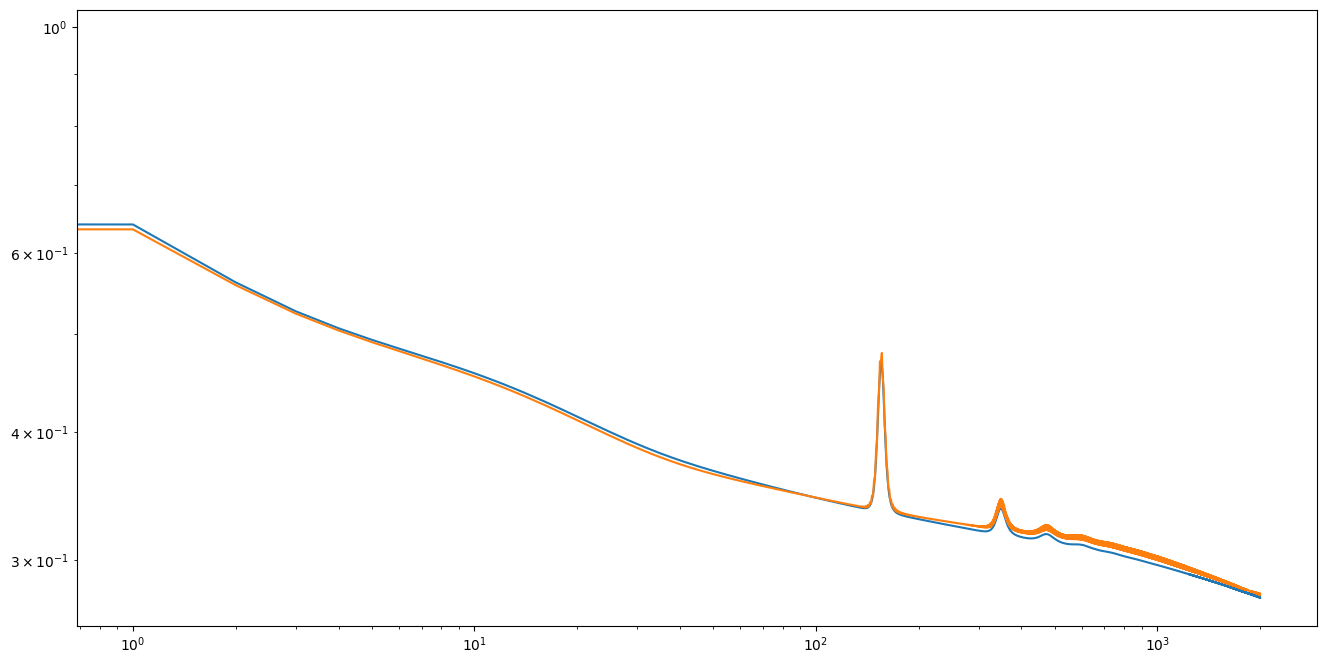

In [139]:
# Gradient Descent

from tqdm.notebook import tqdm
import time
# Hyperparameters
layers_size = [8, 20, 20, 1]
# Training options
num_epochs = 2000
learning_rate = 1e-1
########################################

params = initialize_params(layers_size)

grad = jax.jit(jax.grad(loss_MSE, argnums=2))
loss_jit = jax.jit(loss_MSE)
grad_jit = jax.jit(grad)

n_samples = x_train.shape[0]

history_train = list()
history_valid = list()
history_train.append(loss_jit(x_train, y_train, params))
history_valid.append(loss_jit(x_valid, y_valid, params))

t0 = time.time()
for epoch in tqdm(range(num_epochs)):
    grads = grad_jit(x_train, y_train, params)

    for i in range(len(params)):
        params[i] -= learning_rate * grads[i]

    history_train.append(loss_jit(x_train, y_train, params))
    history_valid.append(loss_jit(x_valid, y_valid, params))

print("elapsed time: %f s" % (time.time() - t0))
print("loss train     : %1.3e" % history_train[-1])
print("loss validation: %1.3e" % history_valid[-1])

fig, axs = plt.subplots(1, figsize=(16, 8))
axs.loglog(history_train, label="train")
axs.loglog(history_valid, label="validation")

  0%|          | 0/2000 [00:00<?, ?it/s]

elapsed time: 50.566557 s
loss train     : 2.147e-01
loss validation: 2.280e-01


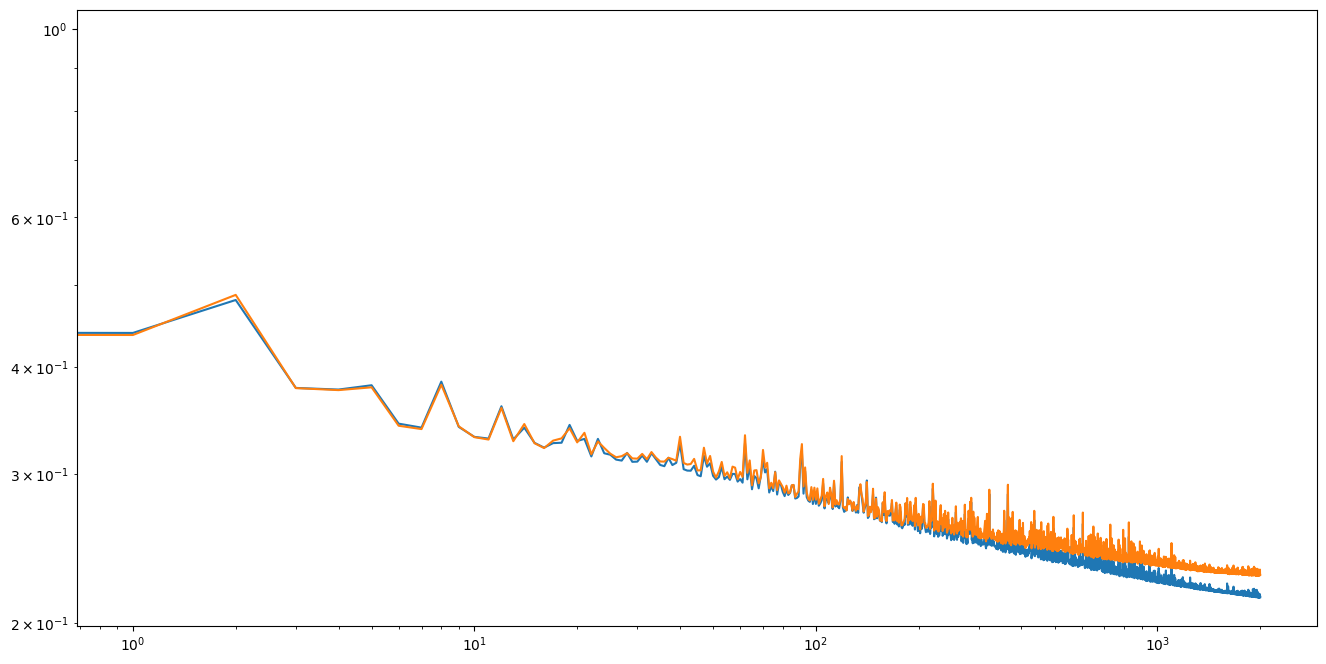

In [142]:
# Stochastic Gradient Descent

# Hyperparameters
layers_size = [8, 20, 20, 1]
# Training options
num_epochs = 2000
learning_rate_max = 2e-1
learning_rate_min = 5e-2
learning_rate_decay = 2000
batch_size = 1000
########################################

params = initialize_params(layers_size)

loss_jit = jax.jit(loss_MSE)
jit_grad = jax.jit(jax.grad(loss_jit, argnums=2))

n_samples = x_train.shape[0]

history_train = list()
history_valid = list()
history_train.append(loss_jit(x_train, y_train, params))
history_valid.append(loss_jit(x_valid, y_valid, params))

t0 = time.time()
for epoch in tqdm(range(num_epochs)):
    learning_rate = max(
        learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay)
    )

    perm = np.random.permutation(n_samples)
    for i in range(0, n_samples, batch_size):
        batch_idx = perm[i : i + batch_size]
        x_batch = x_train[batch_idx]
        y_batch = y_train[batch_idx]
        grads = grad_jit(x_batch, y_batch, params)

        for i in range(len(params)):
            params[i] -= learning_rate * grads[i]

    history_train.append(loss_jit(x_train, y_train, params))
    history_valid.append(loss_jit(x_valid, y_valid, params))

print("elapsed time: %f s" % (time.time() - t0))
print("loss train     : %1.3e" % history_train[-1])
print("loss validation: %1.3e" % history_valid[-1])

fig, axs = plt.subplots(1, figsize=(16, 8))
axs.loglog(history_train, label="train")
axs.loglog(history_valid, label="validation")

## Ex. 1 LAB 06

In [35]:
import jax.numpy as jnp
import jax

In [36]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(inputs)

outputs = np.array([[0], [1], [1], [0]])


[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [38]:
n1, n2, n3, n4 = 2, 4, 3, 1

np.random.seed(0)

W1 = np.random.randn(n2, n1)
b1 = np.zeros((4, 1))

W2 = np.random.randn(n3, n2)
b2 = np.zeros((3, 1))

W3 = np.random.randn(n4, n3)
b3 = np.zeros((1, 1))

params = [W1, b1, W2, b2, W3, b3]
params = [jnp.array(p) for p in params]

In [39]:
def ANN(x, params):
  W1, b1, W2, b2, W3, b3 = params
  layer1 = x.T
  layer2 = jnp.tanh(W1 @ layer1 + b1)
  layer3 = jnp.tanh(W2 @ layer2 + b2)
  layer4 = jnp.tanh(W3 @ layer3 + b3)
  # Rescale the output between [0, 1]
  layer4 = (layer4 + 1.0) / 2.0
  return layer4.T

In [40]:
for input in inputs:
  out = ANN(input.reshape((-1, 2)), params)
  print(f"{input[0]} XOR {input[1]} --> {out}")

0 XOR 0 --> [[0.5]]
0 XOR 1 --> [[0.5722416]]
1 XOR 0 --> [[0.107804]]
1 XOR 1 --> [[0.10987768]]


In [41]:
def loss_quadratic(x, y, params):
  y_pred = ANN(x, params)
  error = y_pred - y
  return jnp.sum(error**2)

loss_quadratic(inputs, outputs, params)

Array(1.2410641, dtype=float32)

In [42]:
def loss_cross_entropy(x, y, params):
  y_pred = ANN(x, params)
  return -jnp.sum(y * jnp.log(y_pred) + (1-y) * jnp.log(1 - y_pred))

loss_cross_entropy(inputs, outputs, params)

Array(3.5951784, dtype=float32)

In [43]:
loss_quad = jax.jit(loss_quadratic)
grad_quad = jax.jit(jax.grad(loss_quad, argnums=2))

loss_X = jax.jit(loss_cross_entropy)
grad_X = jax.jit(jax.grad(loss_X, argnums=2))

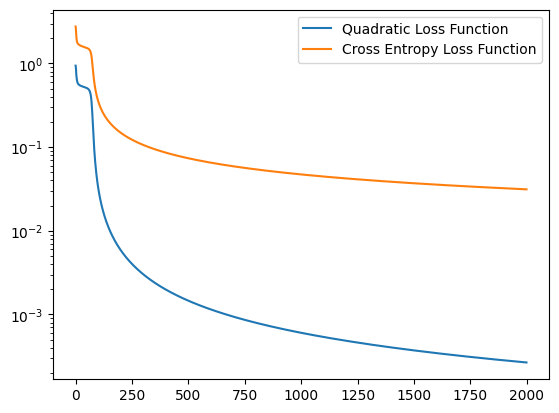

In [44]:
lr = 0.1
n_epochs = 2000

hist_quad_loss = []
hist_X_loss = []

for epoch in range(n_epochs):
  grad_val = grad_quad(inputs, outputs, params)
  for i in range(len(params)):
    params[i] = params[i] - lr * grad_val[i]
  hist_quad_loss.append(loss_quad(inputs, outputs, params))
  hist_X_loss.append(loss_X(inputs, outputs, params))

plt.semilogy(hist_quad_loss, label="Quadratic Loss Function")
plt.semilogy(hist_X_loss, label="Cross Entropy Loss Function")
plt.legend()

In [45]:
for input in inputs:
  out = ANN(input.reshape(-1, 2), params)
  print(f"{input[0]} XOR {input[1]}: {out}")

0 XOR 0: [[0.00479445]]
0 XOR 1: [[0.9935236]]
1 XOR 0: [[0.98872]]
1 XOR 1: [[0.00861797]]


In [46]:
TP = ANN(jnp.array([[0, 1], [1, 0]]), params)
TN = 1 - ANN(jnp.array([[0, 0], [1, 1]]), params)
accuracy = (sum(TP)+ sum(TN)) / 4
print(f"Accuracy {accuracy[0]*100:.2f}%")

Accuracy 99.22%


## Ex.2 $→$ See LAB07

# Artificial Neural Network Regularization

In [159]:
def MSW(params):
    weights = params[::2]
    partial_sum = 0.0
    n_weights = 0
    for W in weights:
        partial_sum += jnp.sum(W * W)
        n_weights += W.shape[0] * W.shape[1]
    return partial_sum / n_weights


def loss(x, y, params, penalization):
    return MSE(x, y, params) + penalization * MSW(params)


print(MSW(params))
print(loss(x_train, y_train, params, 1.0))

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70       1  
..          ...     ...  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  

[398 rows x 8 columns]

# 1$^{st}$ order methods

In [143]:
# Function creation
f = lambda x: np.sin(x) * np.exp(-0.1 * x) + 0.1 * np.cos(np.pi * x)
a, b = 0, 10

In [144]:
def get_training_data(N, noise):
    np.random.seed(0)  # for reproducibility
    x = np.linspace(a, b, N)[:, None]
    y = f(x) + noise * np.random.randn(N, 1)
    return x, y

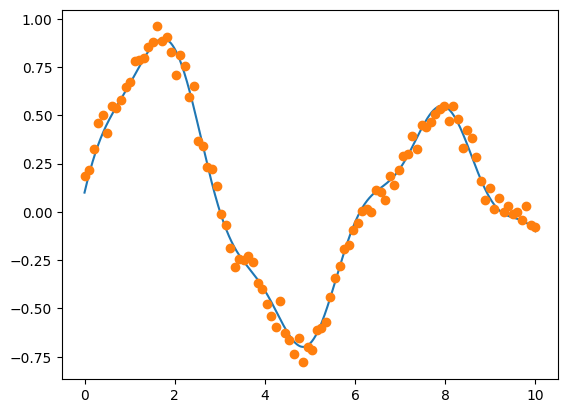

In [146]:
# Plot the function
x_fine = np.linspace(a, b, 1000)[:, None]
plt.plot(x_fine, f(x_fine))

xx, yy = get_training_data(100, 0.05)
plt.plot(xx, yy, "o")

In [149]:
# Then create the ANN just like above (Parameter Initialization, Loss Function Definition, ANN function definition)
def initialize_params(layers_size):
    np.random.seed(0)  # for reproducibility
    params = list()
    for i in range(len(layers_size) - 1):
        W = np.random.randn(layers_size[i + 1], layers_size[i])
        b = np.zeros((layers_size[i + 1], 1))
        params.append(W)
        params.append(b)
    return params

def ANN(x, params):
    # layer = x.T
    layer = (2 * x.T - (a + b)) / (b - a)
    num_layers = int(len(params) / 2 + 1)
    weights = params[0::2]
    biases = params[1::2]
    for i in range(num_layers - 1):
        layer = jnp.dot(weights[i], layer) - biases[i]
        if i < num_layers - 2:
            layer = jnp.tanh(layer)
    return layer.T

def loss(x, y, params):
    error = ANN(x, params) - y
    return jnp.mean(error * error)

params = initialize_params([1, 5, 5, 1])
loss(xx, yy, params)


Array(0.28158015, dtype=float32)

In [150]:


# This is just an helper function to see the different instants in time
from IPython import display


class Callback:
    def __init__(self, refresh_rate=250):
        self.refresh_rate = refresh_rate
        self.fig, self.axs = plt.subplots(1, 2, figsize=(16, 8))
        self.x_fine = np.linspace(a, b, 200)[:, None]
        self.epoch = 0
        self.__call__(-1)

    def __call__(self, epoch):
        self.epoch = epoch
        if (epoch + 1) % self.refresh_rate == 0:
            self.draw()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1e-16)

    def draw(self):
        if self.epoch > 0:
            self.axs[0].clear()
            self.axs[0].loglog(history)
            self.axs[0].set_title("epoch %d" % (self.epoch + 1))

        self.axs[1].clear()
        self.axs[1].plot(self.x_fine, f(self.x_fine))
        self.axs[1].plot(self.x_fine, ANN(self.x_fine, params))
        self.axs[1].plot(xx, yy, "o")

## GD

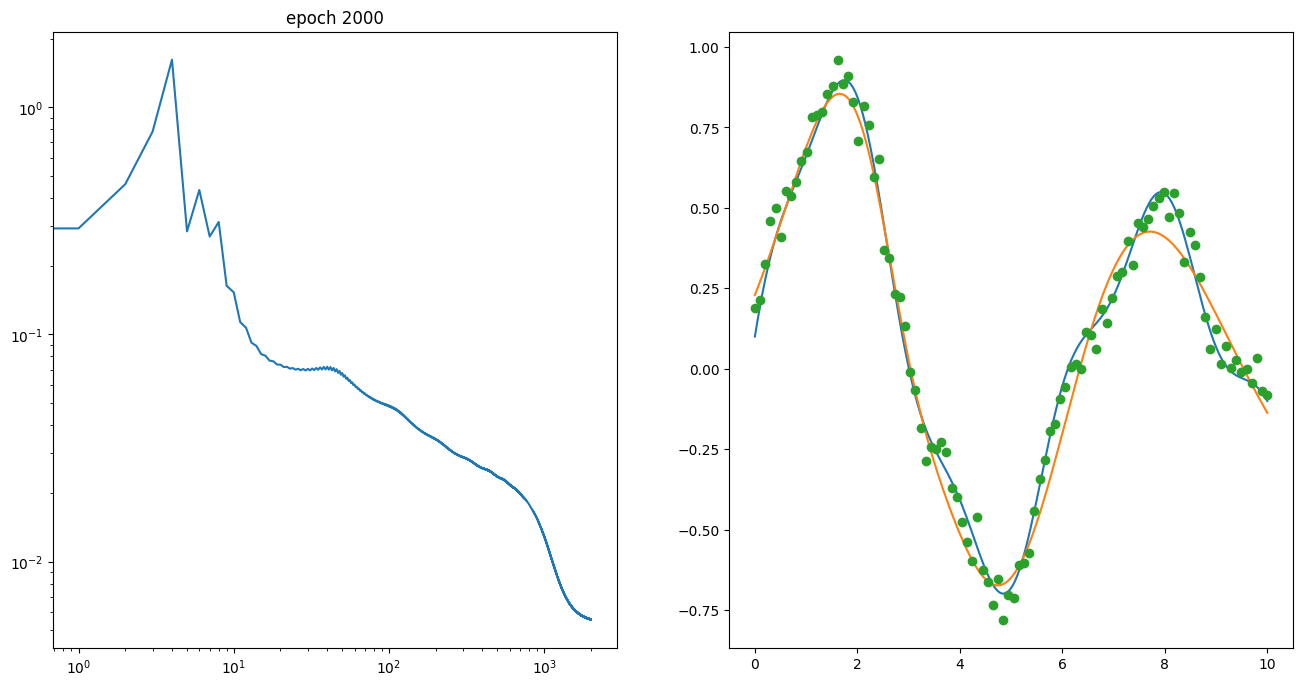

loss: 5.552e-03


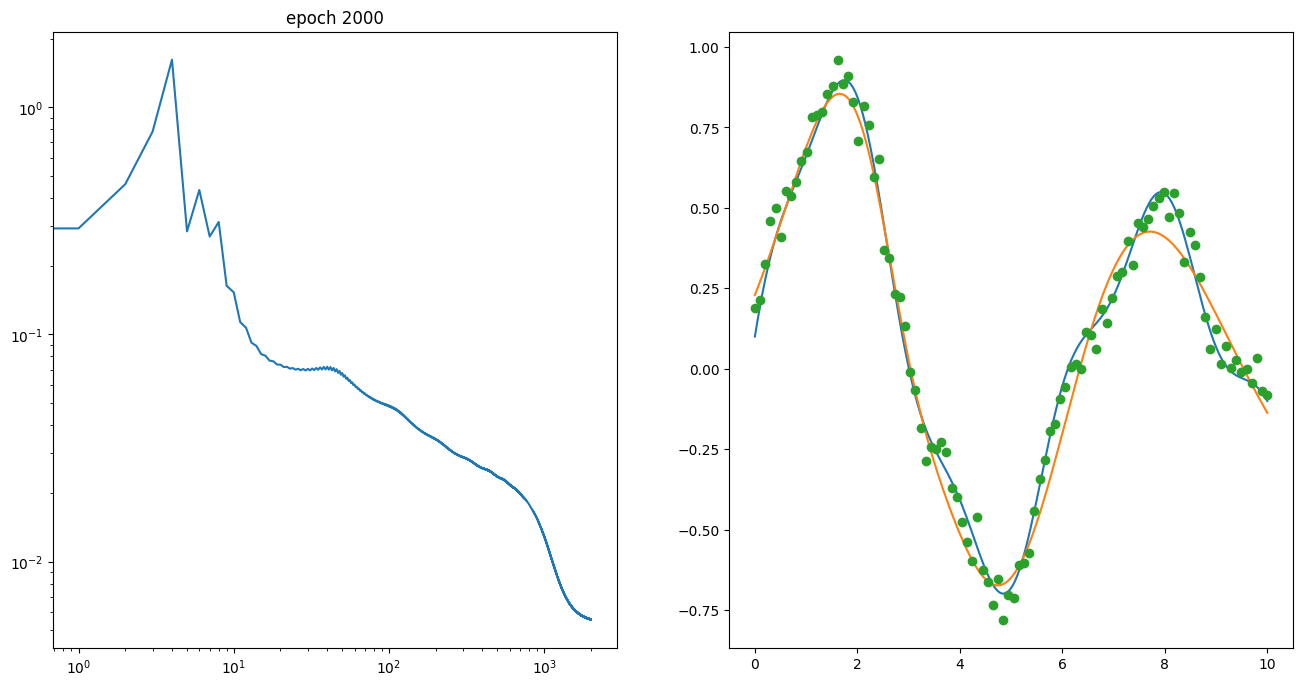

In [151]:
# Training

# Data
n_training_points = 100
noise = 0.05
# Hyperparameters
layers_size = [1, 5, 5, 1]
# Training options
num_epochs = 2000
learning_rate = 1e-1
########################################

xx, yy = get_training_data(n_training_points, noise)
params = initialize_params(layers_size)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=2))

history = list()
history.append(loss_jit(xx, yy, params))

cb = Callback(refresh_rate=200)

for epoch in range(num_epochs):
    grads = grad_jit(xx, yy, params)
    for i in range(len(params)):
        params[i] -= learning_rate * grads[i]
    history.append(loss_jit(xx, yy, params))
    cb(epoch)
cb.draw()

print("loss: %1.3e" % history[-1])

## SGD

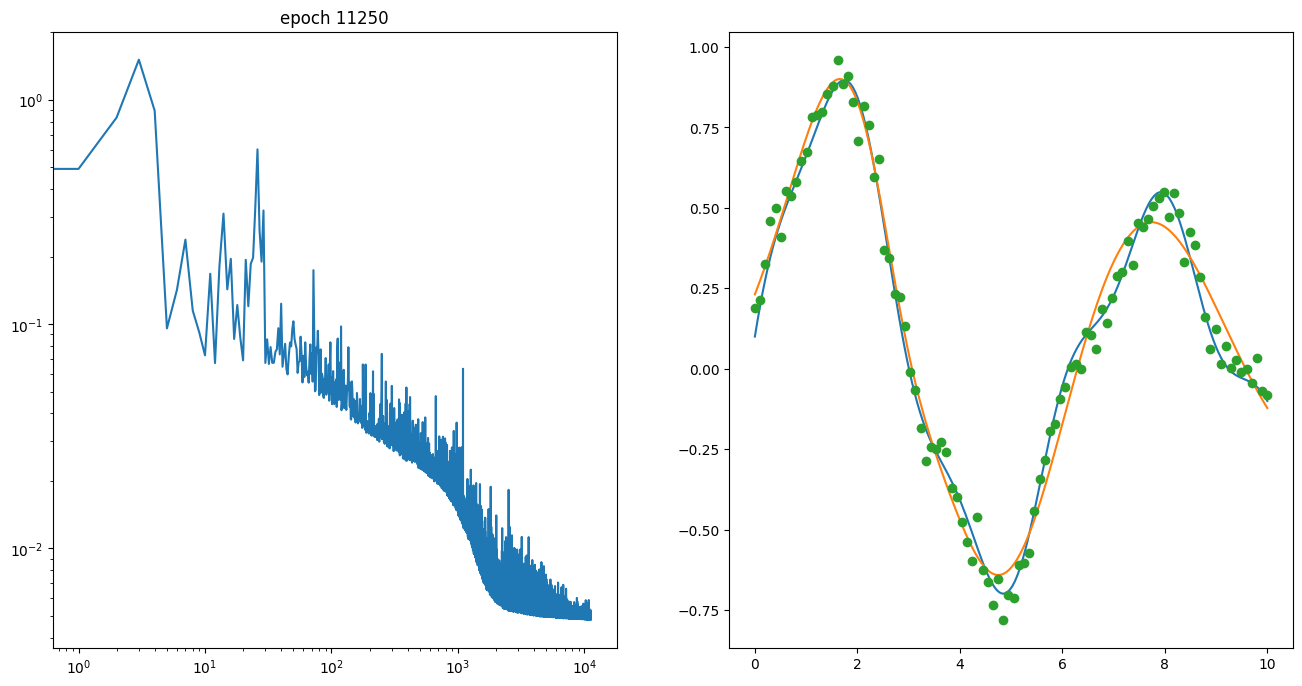

KeyboardInterrupt: 

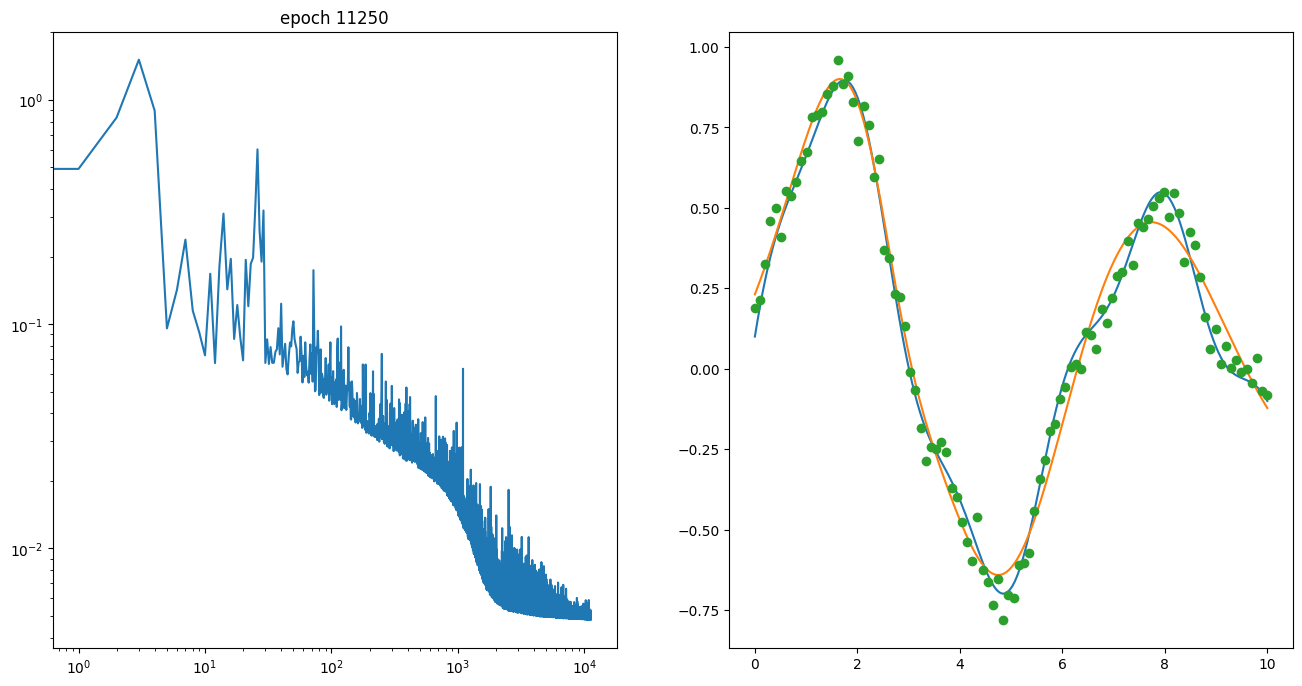

In [155]:
# Data
n_training_points = 100
noise = 0.05
# Hyperparameters
layers_size = [1, 5, 5, 1]
# Training options
num_epochs = 20000
learning_rate_max = 1e-1
learning_rate_min = 2e-2
learning_rate_decay = 10000
batch_size = 10
########################################

xx, yy = get_training_data(n_training_points, noise)
params = initialize_params(layers_size)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=2))

history = list()
history.append(loss_jit(xx, yy, params))

cb = Callback(refresh_rate=250)

for epoch in range(num_epochs):
    learning_rate = max(
        learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay)
    )
    idxs = np.random.choice(n_training_points, batch_size)
    grads = grad_jit(xx[idxs, :], yy[idxs, :], params)
    for i in range(len(params)):
        params[i] -= learning_rate * grads[i]

    history.append(loss_jit(xx, yy, params))
    cb(epoch)
cb.draw()

print("loss: %1.3e" % history[-1])

## SGD with Momentum

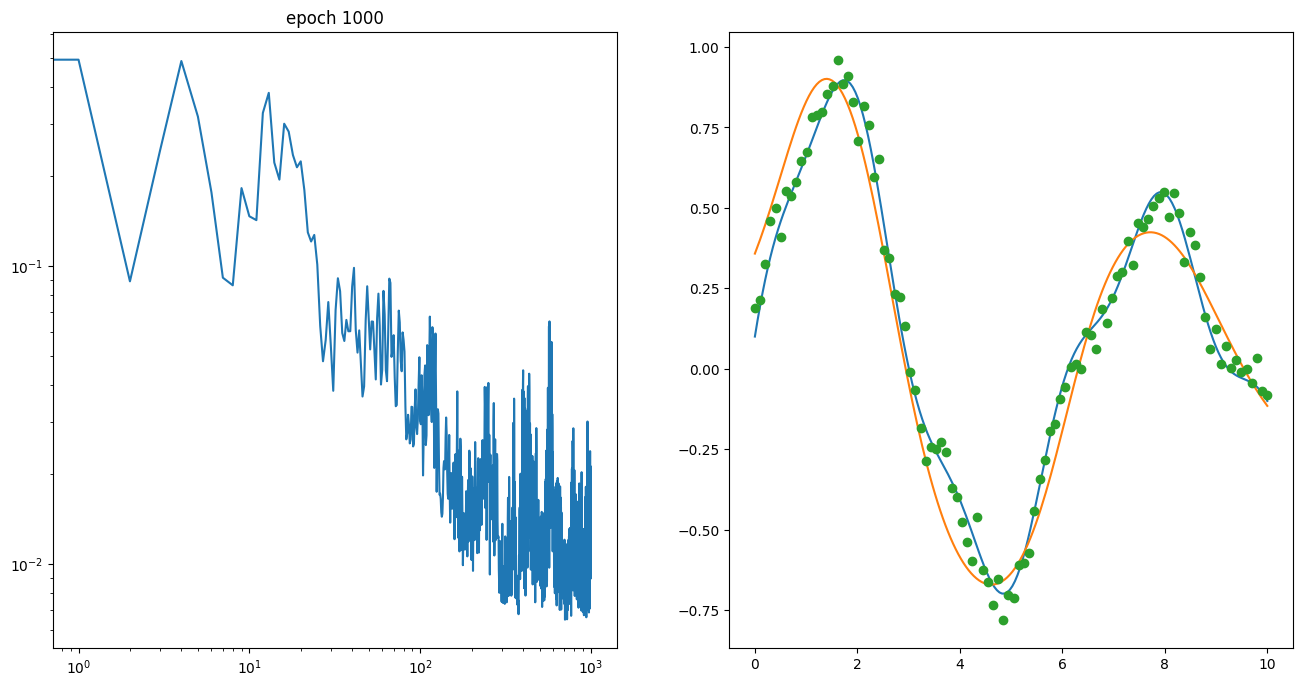

loss: 1.056e-02


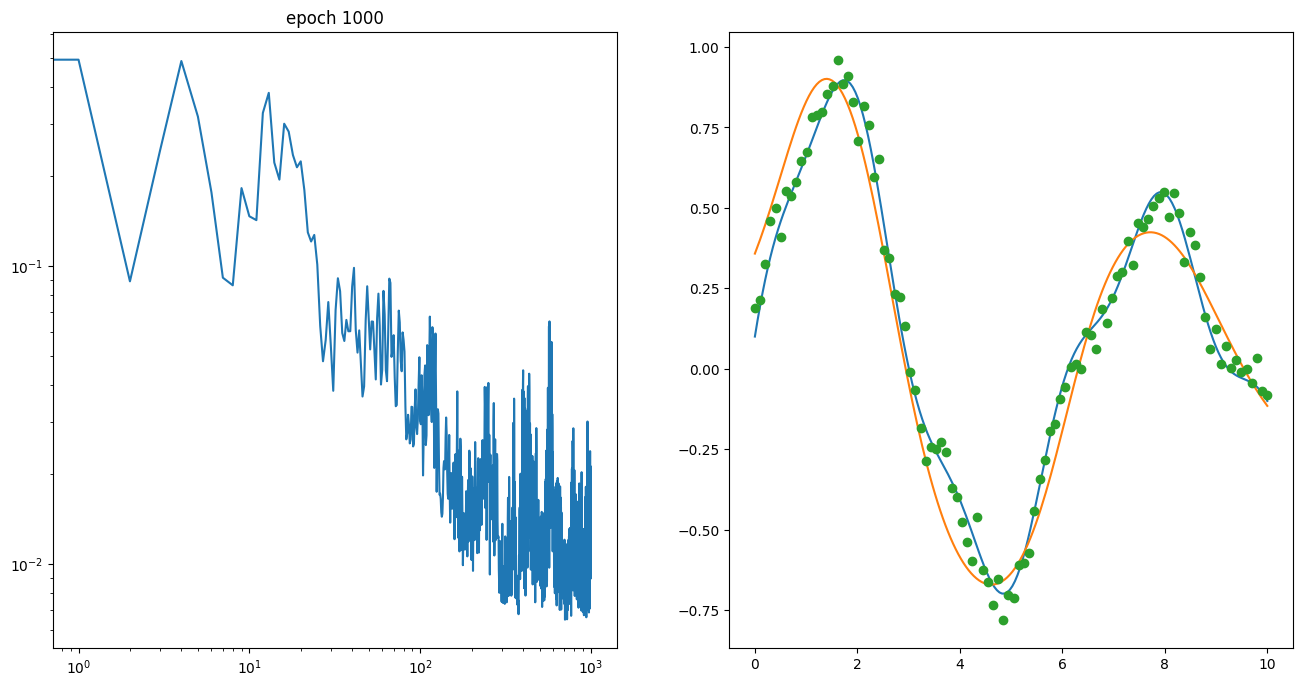

In [156]:
# Data
n_training_points = 100
noise = 0.05
# Hyperparameters
layers_size = [1, 5, 5, 1]
# Training options
num_epochs = 20000
learning_rate_max = 1e-1
learning_rate_min = 1e-2
learning_rate_decay = 10000
batch_size = 10
alpha = 0.9
########################################

xx, yy = get_training_data(n_training_points, noise)
params = initialize_params(layers_size)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=2))

history = list()
history.append(loss_jit(xx, yy, params))

cb = Callback(refresh_rate=250)

velocity = [0.0 for _ in range(len(params))]
for epoch in range(num_epochs):
    learning_rate = max(
        learning_rate_min, learning_rate_max * (1 - epoch / learning_rate_decay)
    )
    idxs = np.random.choice(n_training_points, batch_size)
    grads = grad_jit(xx[idxs, :], yy[idxs, :], params)

    for i in range(len(params)):
        velocity[i] = alpha * velocity[i] - learning_rate * grads[i]
        params[i] += velocity[i]

    history.append(loss_jit(xx, yy, params))
    cb(epoch)
cb.draw()

print("loss: %1.3e" % history[-1])

## AdaGrad

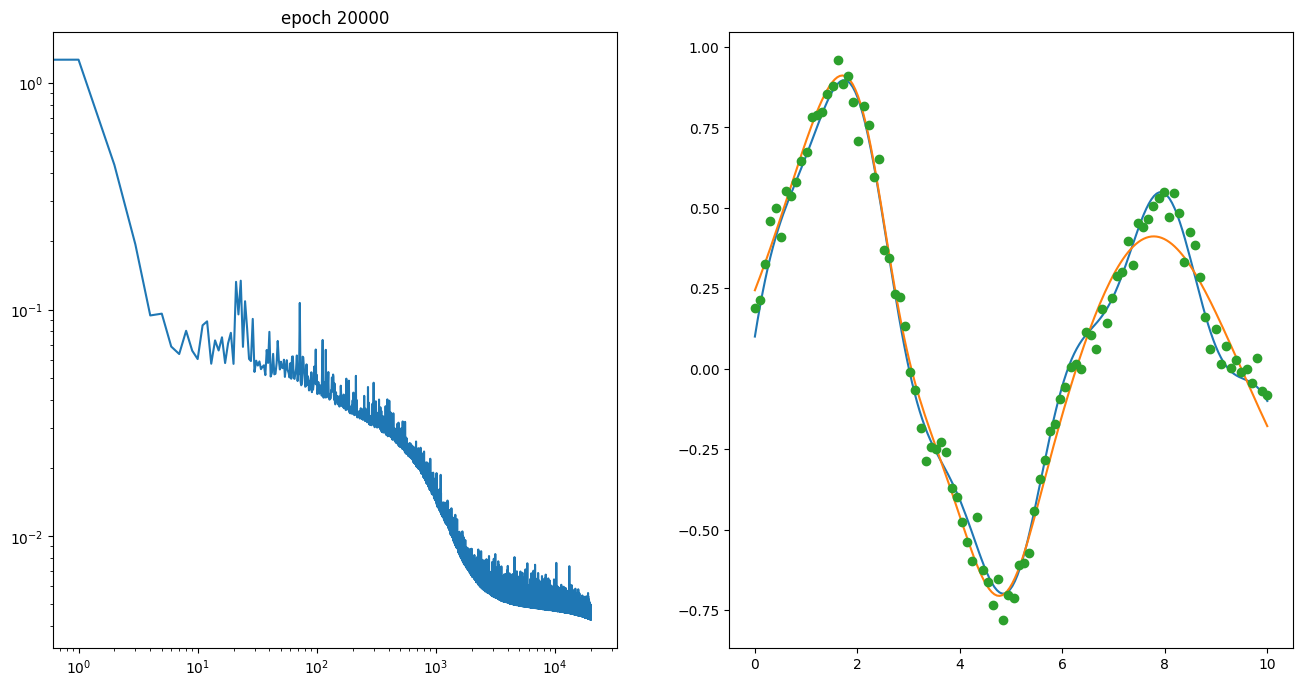

loss: 4.458e-03


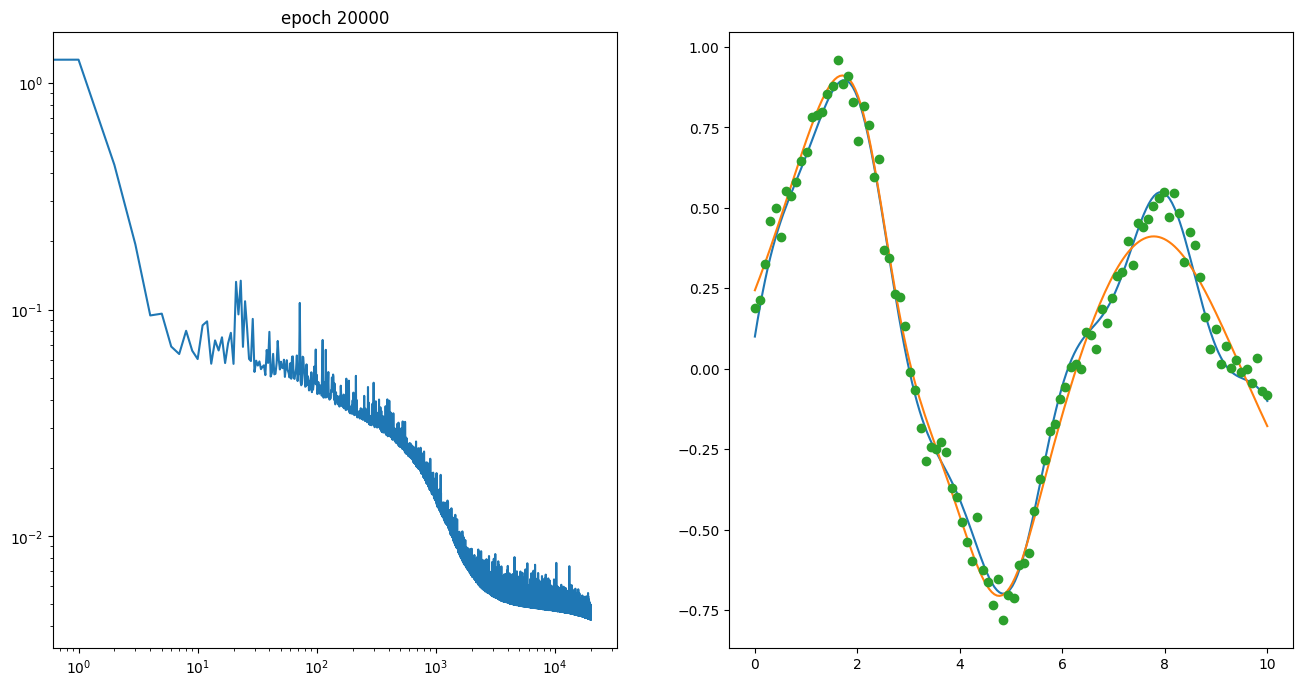

In [157]:
# Data
n_training_points = 100
noise = 0.05
# Hyperparameters
layers_size = [1, 5, 5, 1]
# Training options
num_epochs = 20000
batch_size = 10
learning_rate = 1e-1
delta = 1e-7
########################################

xx, yy = get_training_data(n_training_points, noise)
params = initialize_params(layers_size)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=2))

history = list()
history.append(loss_jit(xx, yy, params))

cb = Callback(refresh_rate=250)

cumulated_square_grad = [0.0 for i in range(len(params))]
for epoch in range(num_epochs):
    idxs = np.random.choice(n_training_points, batch_size)
    grads = grad_jit(xx[idxs, :], yy[idxs, :], params)

    for i in range(len(params)):
        cumulated_square_grad[i] += grads[i] * grads[i]
        params[i] -= (
            learning_rate / (delta + jnp.sqrt(cumulated_square_grad[i])) * grads[i]
        )

    history.append(loss_jit(xx, yy, params))
    cb(epoch)
cb.draw()

print("loss: %1.3e" % history[-1])

## RMSPROP

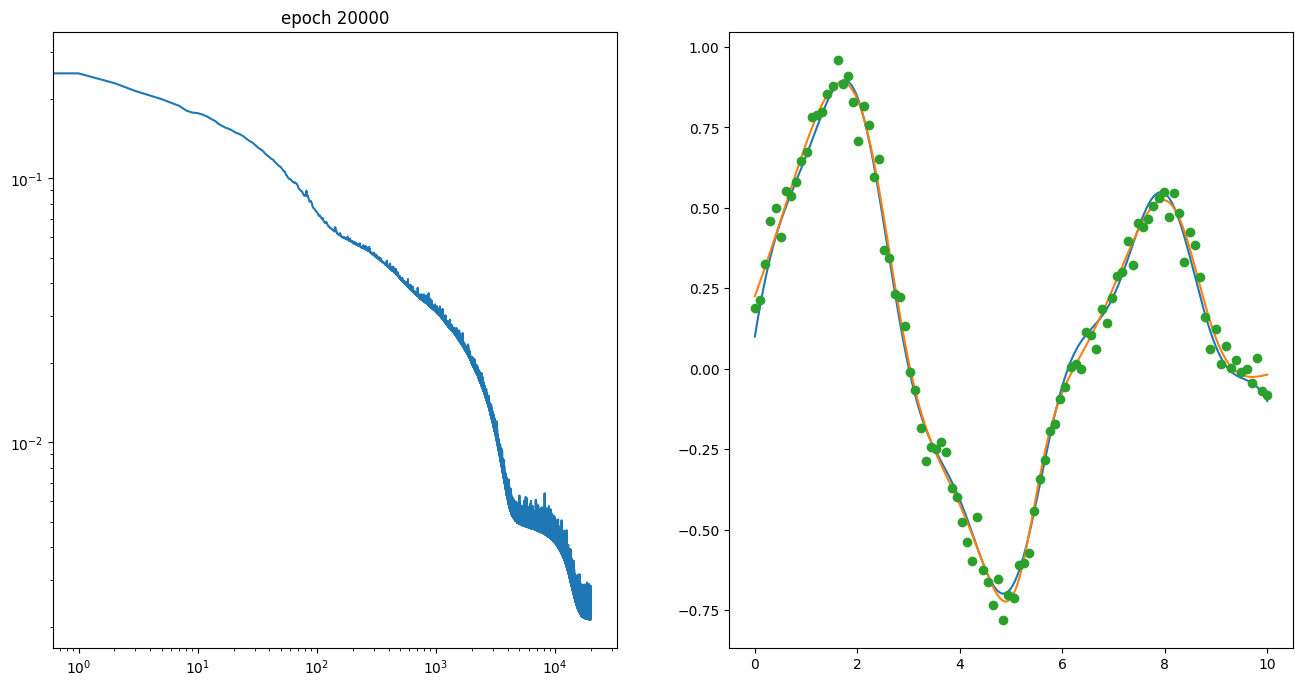

loss: 2.169e-03


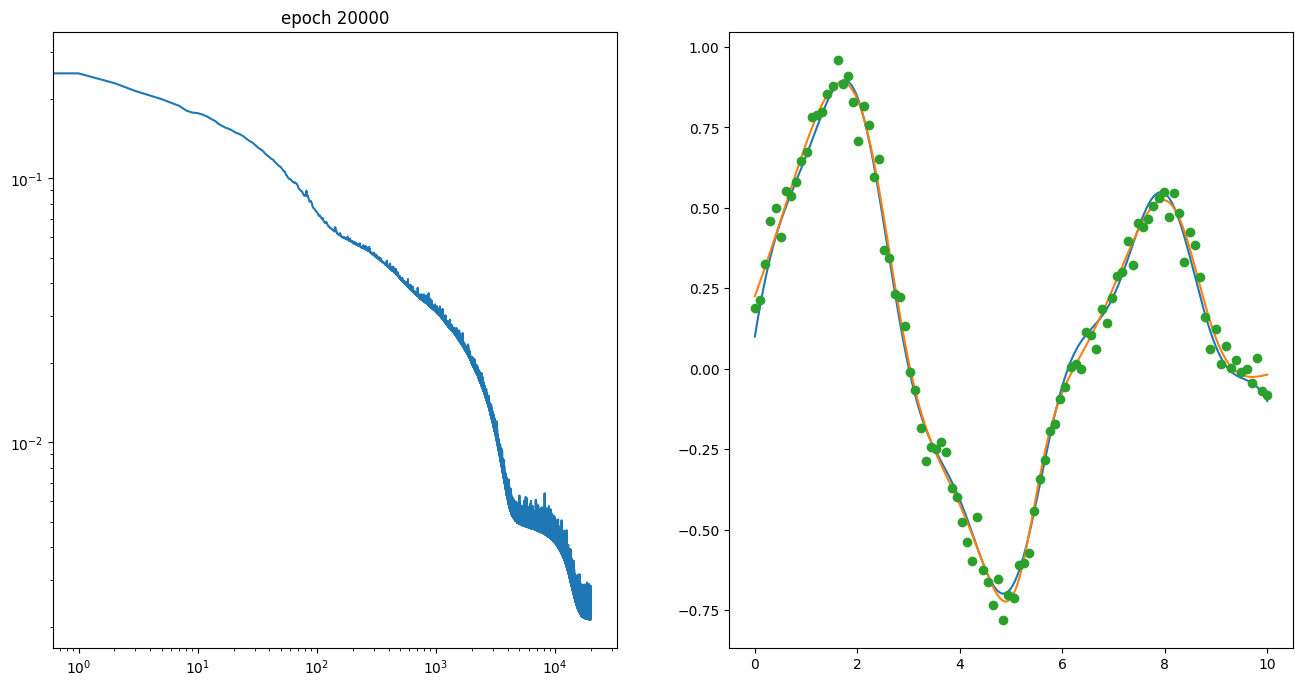

In [158]:
# Data
n_training_points = 100
noise = 0.05
# Hyperparameters
layers_size = [1, 5, 5, 1]
# Training options
num_epochs = 20000
batch_size = 50
learning_rate = 1e-3
decay_rate = 0.9
delta = 1e-7
########################################

xx, yy = get_training_data(n_training_points, noise)
params = initialize_params(layers_size)

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=2))

history = list()
history.append(loss_jit(xx, yy, params))

cb = Callback(refresh_rate=250)

cumulated_square_grad = [0.0 for i in range(len(params))]
for epoch in range(num_epochs):
    idxs = np.random.choice(n_training_points, batch_size)
    grads = grad_jit(xx[idxs, :], yy[idxs, :], params)

    for i in range(len(params)):
        cumulated_square_grad[i] = (
            decay_rate * cumulated_square_grad[i]
            + (1 - decay_rate) * grads[i] * grads[i]
        )
        params[i] -= (
            learning_rate / (delta + jnp.sqrt(cumulated_square_grad[i])) * grads[i]
        )

    history.append(loss_jit(xx, yy, params))
    cb(epoch)
cb.draw()

print("loss: %1.3e" % history[-1])

# 2 $^{nd}$ order optimization

In [162]:
# Let's consider a random matrix

n = 100

np.random.seed(0)
A = np.random.randn(n, n)
x_ex = np.random.randn(n)
b = A @ x_ex

In [160]:
grad = jax.grad(loss)
hess = jax.jacfwd(jax.jacrev(loss))

loss_jit = jax.jit(loss)
grad_jit = jax.jit(grad)
hess_jit = jax.jit(hess)

In [167]:
'''If you wanna run it uncomment this loss function
  Probably it does not run
def loss(x):
    return jnp.sum(jnp.square(A @ x - b))
'''

np.random.seed(0)
x_guess = np.random.randn(n)

G_ad = grad_jit(x_guess)
G_ex = 2 * A.T @ (A @ x_guess - b)
print(np.linalg.norm(G_ad - G_ex))

H_ad = hess_jit(x_guess)
H_ex = 2 * A.T @ A
print(np.linalg.norm(H_ad - H_ex))

TypeError: loss() missing 2 required positional arguments: 'y' and 'params'

In [164]:
np.random.seed(1)
v = np.random.randn(n)

hvp_basic = lambda x, v: hess(x) @ v
gvp = lambda x, v: jnp.dot(grad(x), v)
hvp = lambda x, v: jax.grad(gvp, argnums=0)(x, v)

hvp_basic_jit = jax.jit(hvp_basic)
hvp_jit = jax.jit(hvp)

Hv_ad = hvp_jit(x_guess, v)
Hv_ex = H_ex @ v
print(np.linalg.norm(Hv_ad - Hv_ex))

TypeError: loss() missing 2 required positional arguments: 'y' and 'params'

In [ ]:
x = x_guess.copy()
num_epochs = 100
eps = 1e-8

elapsed_time = 0

for epoch in range(num_epochs):
    t0 = time.time()
    H = hess_jit(x)
    G = grad_jit(x)
    incr = np.linalg.solve(H, -G)
    elapsed_time += time.time() - t0
    x += incr

    print("============ epoch %d" % epoch)
    print("loss: %1.3e" % loss_jit(x))
    print("grad: %1.3e" % np.linalg.norm(G))
    print("incr: %1.3e" % np.linalg.norm(incr))

    if np.linalg.norm(incr) < eps:
        break

print(f"Elapsed time: {elapsed_time:.4f} [s]")
rel_err = np.linalg.norm(x - x_ex) / np.linalg.norm(x_ex)
print(f"Relative error: {rel_err:1.3e}")

In [ ]:
def conjugate_gradient(matvec_fn, b, tol=1e-12, max_iter=1000):
    """
    Conjugate Gradient Solver for Ax = b, where A is only accessible via matvec_fn.
    """
    x = jnp.zeros_like(b)
    r = b - matvec_fn(x)  # Residual
    p = r
    rsold = jnp.dot(r, r)

    for _ in range(max_iter):
        Ap = matvec_fn(p)
        alpha = rsold / jnp.dot(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = jnp.dot(r, r)
        if jnp.sqrt(rsnew) < tol:
            break
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    return x


x = x_guess.copy()
num_epochs = 100
eps = 1e-8

elapsed_time = 0

for epoch in range(num_epochs):
    t0 = time.time()
    G = grad_jit(x)
    incr = conjugate_gradient(lambda y: hvp_jit(x, y), -G)
    elapsed_time += time.time() - t0
    x += incr

    print("============ epoch %d" % epoch)
    print("loss: %1.3e" % loss_jit(x))
    print("grad: %1.3e" % np.linalg.norm(G))
    print("incr: %1.3e" % np.linalg.norm(incr))

    if np.linalg.norm(incr) < eps:
        break

print(f"Elapsed time: {elapsed_time:.4f} [s]")
rel_err = np.linalg.norm(x - x_ex) / np.linalg.norm(x_ex)
print(f"Relative error: {rel_err:1.3e}")

In [ ]:
def loss(x):
    return jnp.sum((A @ x - b) ** 4)


grad = jax.grad(loss)
hess = jax.jacfwd(jax.jacrev(loss))

loss_jit = jax.jit(loss)
grad_jit = jax.jit(grad)
hess_jit = jax.jit(hess)

In [ ]:
x = x_guess.copy()
num_epochs = 100
eps = 1e-8

hist = [loss_jit(x)]
t0 = time.time()
for epoch in range(num_epochs):
    l = loss_jit(x)
    hist.append(l)
    H = hess_jit(x)
    G = grad_jit(x)
    incr = np.linalg.solve(H, -G)
    x += incr
    if np.linalg.norm(incr) < eps:
        print("convergence reached!")
        break
ttot = time.time() - t0

plt.semilogy(hist, "o-")
print("epochs: %d" % epoch)
print("relative error: %1.3e" % (np.linalg.norm(x - x_ex) / np.linalg.norm(x_ex)))

## Quasi-Newton Method with BFGS Update

In [ ]:
max_epochs = 1000
tol = 1e-8

import scipy as sp

np.random.seed(0)

epoch = 0
x = x_guess.copy()
I = np.eye(x.size)
Binv = I
grad = grad_jit(x_guess)
history = [loss_jit(x_guess)]

while np.linalg.norm(grad) > tol and epoch < max_epochs:
    epoch += 1
    # search direction
    p = -Binv @ grad

    # line search
    line_search = sp.optimize.line_search(loss_jit, grad_jit, x, p)
    alpha = line_search[0]
    alpha = 1e-8 if alpha is None else alpha
    x_new = x + alpha * p

    # computing y and s
    s = x_new - x
    x = x_new
    grad_new = grad_jit(x_new)
    y = grad_new - grad
    grad = grad_new

    # Sherman–Morrison update
    rho = 1.0 / (np.dot(y, s))
    E = I - rho * np.outer(y, s)
    Binv = E.T @ Binv @ E + rho * np.outer(s, s)

    history.append(loss_jit(x))

plt.semilogy(history, "o-")

# 1D Convolution

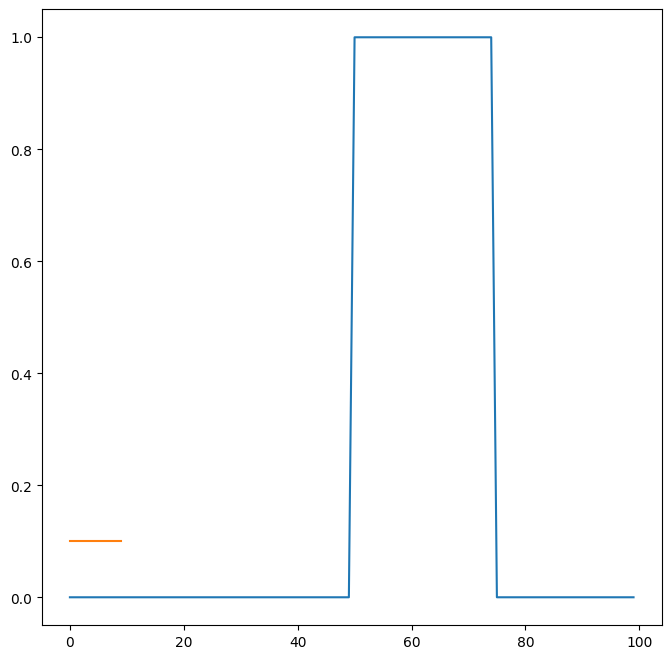

In [185]:
import scipy.signal as signal
import scipy.linalg as linalg

v = np.zeros(100)
v[50:75] = 1

plt.plot(v)

### first kernel
k = np.ones(10) / 10

### second kernel
# k = signal.gaussian(20, std=3)
# k = k / np.sum(k)

### third kernel
# k = np.array([-1,2,-1])

plt.plot(k)

## 1D Convolution through Toeplitz matrices

Execution time: 9.97e-03 s


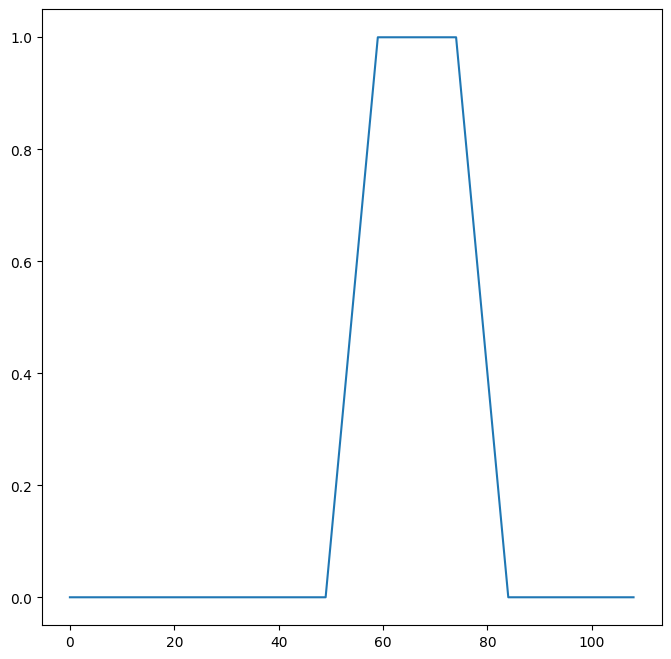

In [186]:
t0 = time.time()

k_padded = np.zeros(len(v) + len(k) - 1)
k_padded[: len(k)] = k
K = linalg.toeplitz(k_padded, np.zeros(len(v)))
v_conv1 = np.matmul(K, v)

print("Execution time: %1.2e s" % (time.time() - t0))

plt.plot(v_conv1)

## 1D Convolution through direct definition

Execution time: 1.72e-03 s


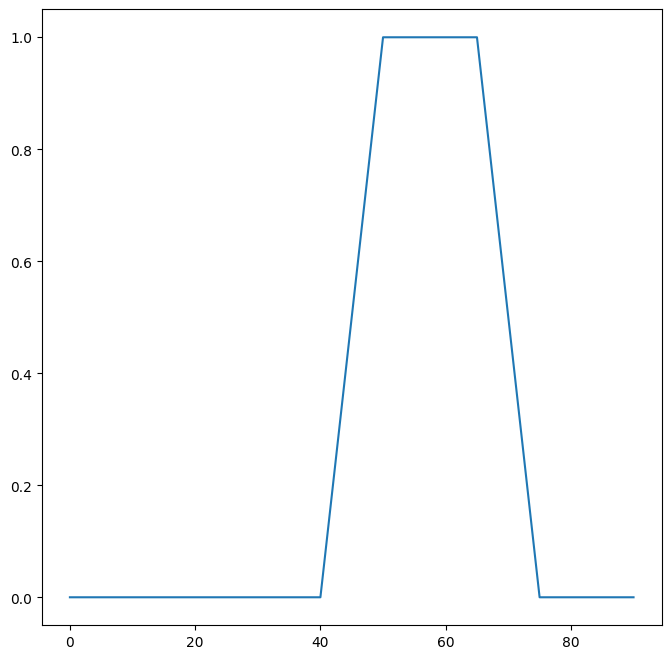

In [187]:
t0 = time.time()

l_out = len(v) - len(k) + 1
v_conv2 = np.zeros(l_out)
for i in range(l_out):
    # for j in range(len(k)):
    #    v_conv2[i] += k[-j] * v[i + j]
    v_conv2[i] = np.sum(np.flip(k) * v[i : i + len(k)])

print("Execution time: %1.2e s" % (time.time() - t0))

plt.plot(v_conv2)

Execution time: 1.52e-03 s


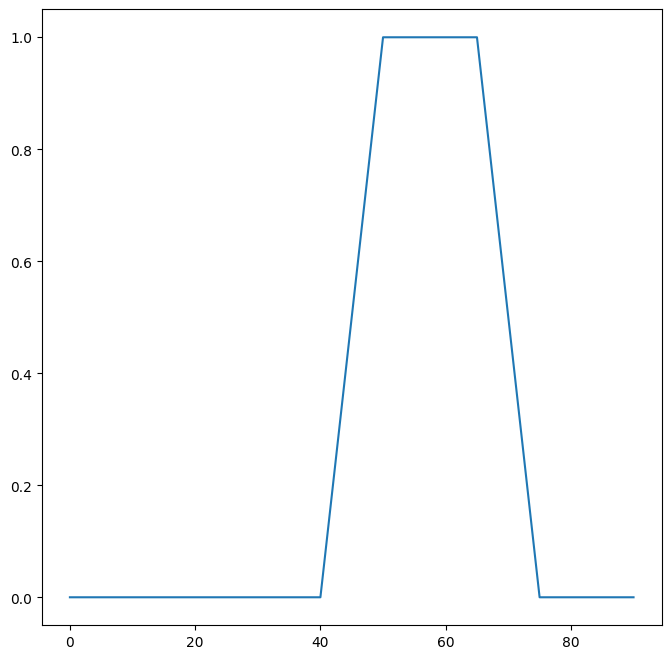

In [189]:
t0 = time.time()

l_out = len(v) - len(k) + 1
v_conv2 = np.array([np.sum(np.flip(k) * v[i : i + len(k)]) for i in range(l_out)])

print("Execution time: %1.2e s" % (time.time() - t0))

plt.plot(v_conv2)

## 1D Convolution through DFT

Execution time: 1.33e-03 s


Text(0.5, 1.0, 'v * k')

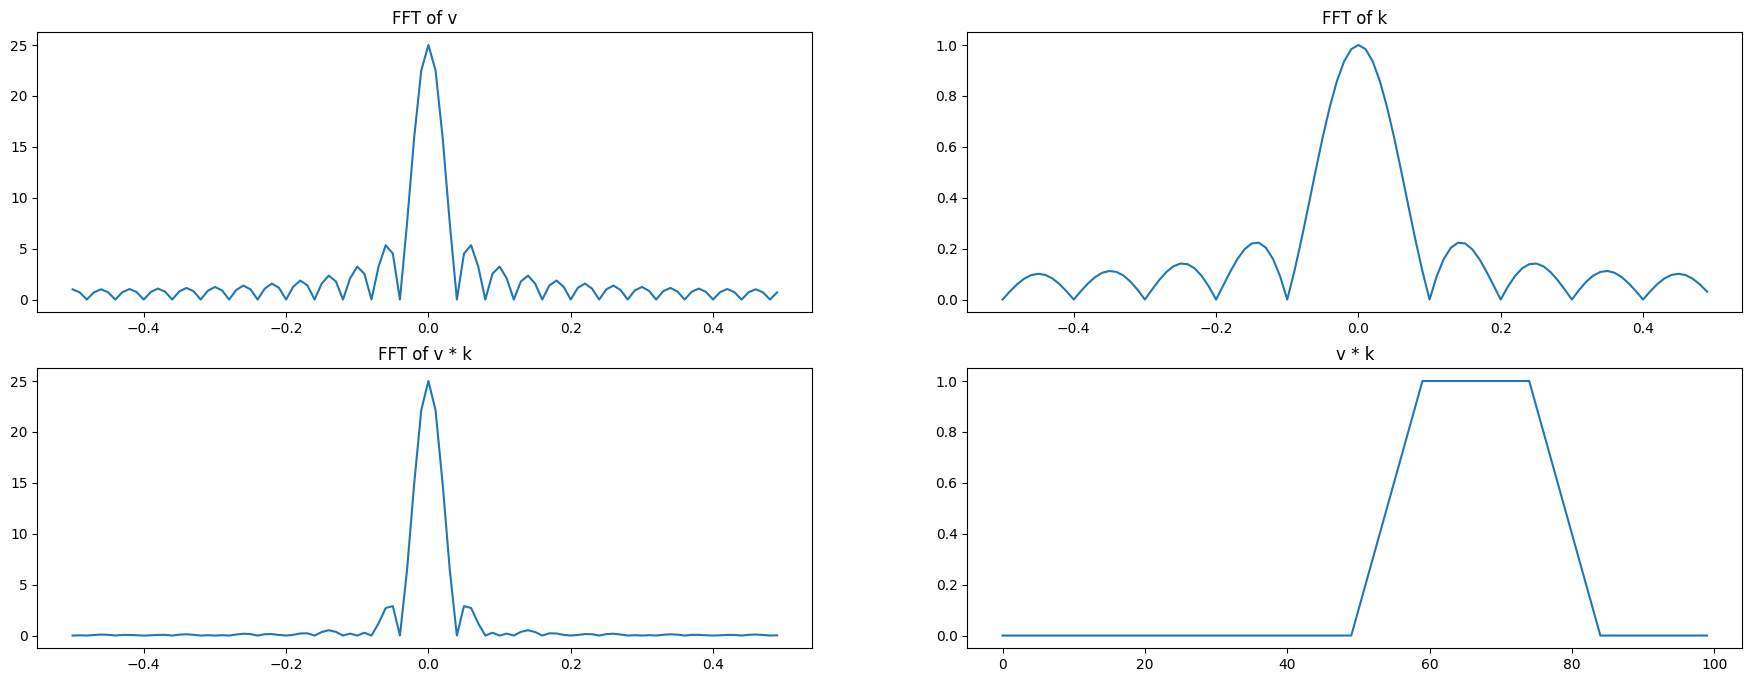

In [188]:
from numpy.fft import ifft, fft, fftshift, fftfreq

t0 = time.time()

v_fft = fft(v)
k_fft = fft(k, len(v))

vk_fft = v_fft * k_fft

v_conv3 = np.real(ifft(vk_fft))

print("Execution time: %1.2e s" % (time.time() - t0))

freq = fftfreq(len(v))

fig, axs = plt.subplots(2, 2, figsize=(22, 8))
axs[0, 0].plot(fftshift(freq), fftshift(np.absolute(v_fft)))
axs[0, 0].set_title("FFT of v")
axs[0, 1].plot(fftshift(freq), fftshift(np.absolute(k_fft)))
axs[0, 1].set_title("FFT of k")
axs[1, 0].plot(fftshift(freq), fftshift(np.absolute(vk_fft)))
axs[1, 0].set_title("FFT of v * k")
axs[1, 1].plot(v_conv3)
axs[1, 1].set_title("v * k")

## 1D convolution through the command `scipy.signal.convolve`

Execution time: 9.90e-04 s


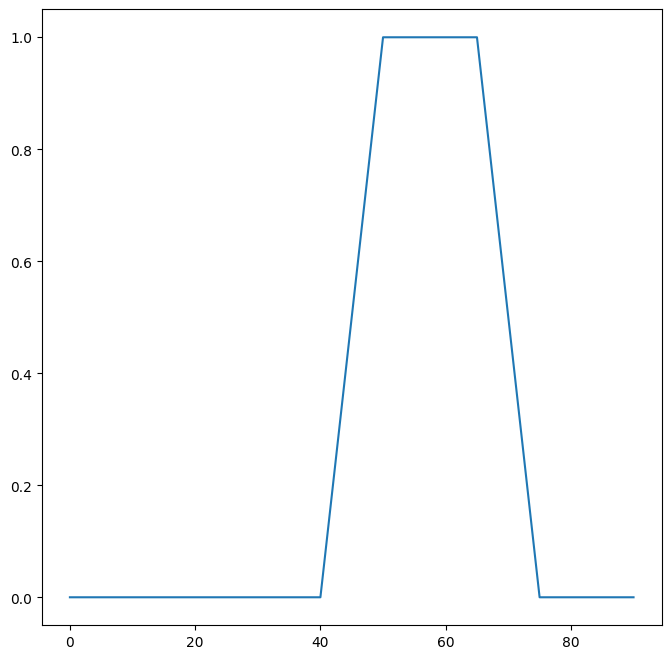

In [190]:
t0 = time.time()

v_conv4 = signal.convolve(v, k, mode="valid")

print("Execution time: %1.2e s" % (time.time() - t0))

plt.plot(v_conv4)

# 2D Convolution

(-0.5, 639.5, 483.5, -0.5)

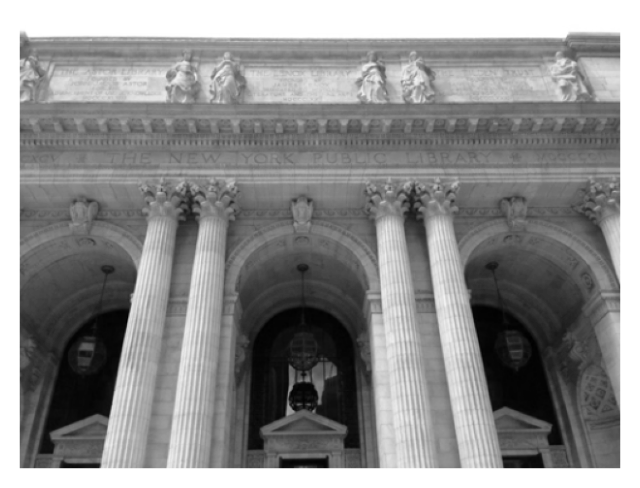

In [172]:
from matplotlib.image import imread

image_path = "newyork.png"

v = np.mean(imread(image_path), axis=2)

plt.rcParams["figure.figsize"] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

In [173]:
# Some kernels

kernel_blur1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10, 10)) / 100

kernel_edge1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel_edge2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_edge3 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

kernel_sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
# horizontal and vertical feature detection
kernel_sobel_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
# horizontal and vertical feature detection

kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernel_drunk = np.random.randn(50, 50)

In [174]:
# Choose the desired filter k
k = kernel_blur1

Execution time: 8.24e+00 s


(-0.5, 637.5, 481.5, -0.5)

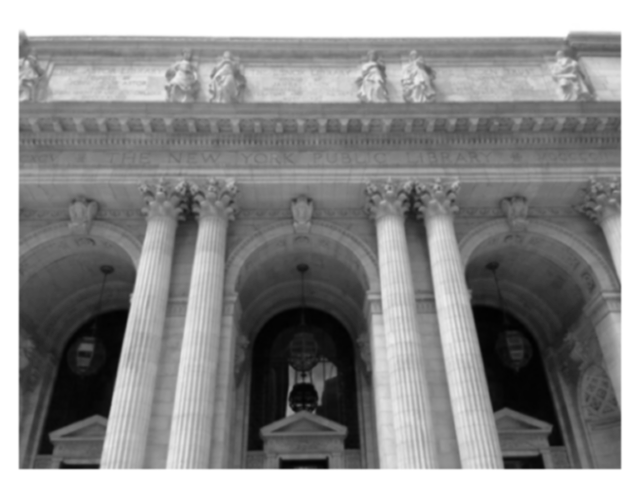

In [175]:
# Direct definition with Boundary layers
t0 = time.time()

s1 = np.array(v.shape)
s2 = np.array(k.shape)
s_out = s1 - s2 + 1
v_conv1 = np.empty(s_out)
for i in range(s_out[0]):
    for j in range(s_out[1]):
        v_conv1[i, j] = np.sum(np.flip(k) * v[i : i + s2[0], j : j + s2[1]])

print("Execution time: %1.2e s" % (time.time() - t0))

img = plt.imshow(v_conv1, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")



Execution time: 4.13e+00 s


(-0.5, 637.5, 481.5, -0.5)

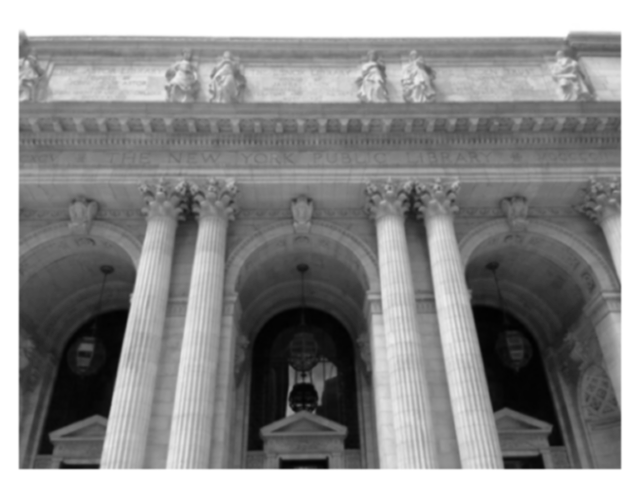

In [176]:
# Direct definition
t0 = time.time()

s1 = np.array(v.shape)
s2 = np.array(k.shape)
s_out = s1 - s2 + 1
v_conv1 = np.array(
    [
        [np.sum(np.flip(k) * v[i : i + s2[0], j : j + s2[1]]) for j in range(s_out[1])]
        for i in range(s_out[0])
    ]
)

print("Execution time: %1.2e s" % (time.time() - t0))

img = plt.imshow(v_conv1, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

Execution time: 3.69e-02 s


<ipython-input-177-b44e25858786>:20: RuntimeWarning: divide by zero encountered in log10
  img = axs[1, 0].imshow(fftshift(np.log10(np.absolute(vk_fft))))


(-0.5, 639.5, 483.5, -0.5)

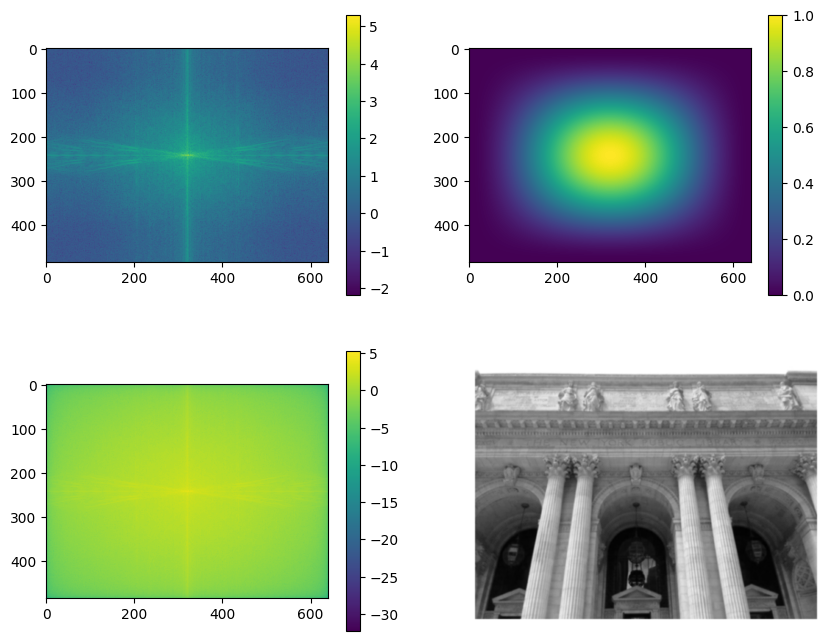

In [177]:
# Convolution through DFT
from numpy.fft import ifft2, fft2, fftshift, fftfreq

t0 = time.time()

v_fft = fft2(v)
k_fft = fft2(k, v.shape)

vk_fft = v_fft * k_fft

v_conv2 = np.real(ifft2(vk_fft))

print("Execution time: %1.2e s" % (time.time() - t0))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
img = axs[0, 0].imshow(fftshift(np.log10(np.absolute(v_fft))))
fig.colorbar(img, ax=axs[0, 0])
img = axs[0, 1].imshow(fftshift((np.absolute(k_fft))))
fig.colorbar(img, ax=axs[0, 1])
img = axs[1, 0].imshow(fftshift(np.log10(np.absolute(vk_fft))))
fig.colorbar(img, ax=axs[1, 0])
axs[1, 1].imshow(v_conv2, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

Execution time: 3.17e-02 s


(-0.5, 639.5, 483.5, -0.5)

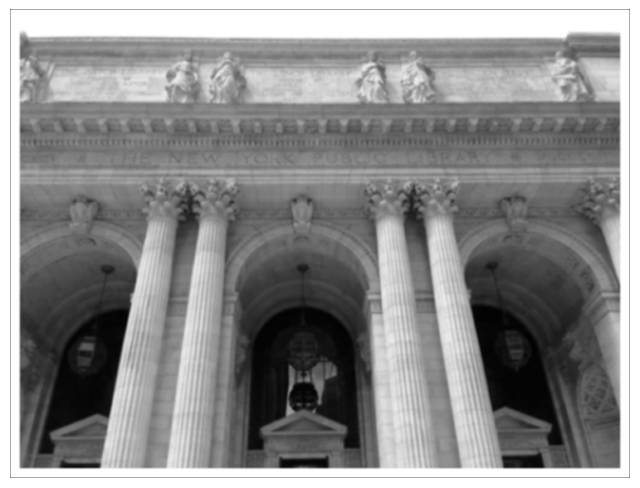

In [180]:
# Convolution calling a library
from scipy import signal

t0 = time.time()

v_conv3 = signal.convolve(v, k, mode="same")

print("Execution time: %1.2e s" % (time.time() - t0))

img = plt.imshow(v_conv3, cmap="gray", vmin=vmin, vmax=vmax)
plt.axis("off")

In [181]:
import jax


def convolve_same_xla_2d(v, k):
    # Reshape kernel for 2D convolution: [filter_height, filter_width, in_channels, out_channels]
    kernel = k[:, :, None, None]  # Add input and output channel dimensions
    # Reshape input for 2D convolution: [batch_size, height, width, in_channels]
    input_array = v[None, :, :, None]  # Add batch and channel dimensions

    # Calculate padding for "same" mode
    pad_height = (k.shape[0] - 1) // 2
    pad_width = (k.shape[1] - 1) // 2
    padding = [(pad_height, pad_height), (pad_width, pad_width)]  # symmetric padding

    # Perform 2D convolution with XLA
    result = jax.lax.conv_general_dilated(
        input_array,  # Input array
        kernel,  # Kernel
        window_strides=(1, 1),  # Stride of 1 for both dimensions
        padding=padding,  # "Same"-like padding
        dimension_numbers=("NHWC", "HWIO", "NHWC"),  # Data and kernel format
    )

    # Reshape the result to a 2D array
    return result[0, :, :, 0]  # Remove batch and channel dimensions


vj = jax.numpy.array(v, dtype=jax.numpy.float32)
kj = jax.numpy.array(k, dtype=jax.numpy.float32)


t0 = time.time()
v_conv4 = convolve_same_xla_2d(vj, kj)
print("Execution time: %1.2e s" % (time.time() - t0))

np.abs(v_conv4 - v_conv3).max()

Execution time: 3.37e-01 s


2.3841858e-07